In [2]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import modeling libraries

pd.pandas.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score

In [7]:
# Import Data

train_data=pd.read_csv('C:\MachineLEarning\Amex\IITM_Amex\Training Data_2021.csv')
test_data=pd.read_csv('C:\MachineLEarning\Amex\IITM_Amex\Test Data_2021.csv')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  int64  
 1   mvar1            83000 non-null  object 
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar4            82465 non-null  float64
 5   mvar5            82465 non-null  float64
 6   mvar6            83000 non-null  object 
 7   mvar7            83000 non-null  object 
 8   mvar8            83000 non-null  object 
 9   mvar9            83000 non-null  object 
 10  mvar10           83000 non-null  object 
 11  mvar11           83000 non-null  object 
 12  mvar12           83000 non-null  object 
 13  mvar13           83000 non-null  object 
 14  mvar14           83000 non-null  int64  
 15  mvar15           83000 non-null  object 
 16  mvar16           83000 non-null  object 
 17  mvar17      

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47000 entries, 0 to 46999
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  47000 non-null  int64  
 1   mvar1            47000 non-null  object 
 2   mvar2            43673 non-null  float64
 3   mvar3            46706 non-null  float64
 4   mvar4            46706 non-null  float64
 5   mvar5            46706 non-null  float64
 6   mvar6            47000 non-null  object 
 7   mvar7            47000 non-null  object 
 8   mvar8            47000 non-null  object 
 9   mvar9            47000 non-null  object 
 10  mvar10           47000 non-null  object 
 11  mvar11           47000 non-null  object 
 12  mvar12           47000 non-null  object 
 13  mvar13           47000 non-null  object 
 14  mvar14           47000 non-null  int64  
 15  mvar15           47000 non-null  object 
 16  mvar16           47000 non-null  object 
 17  mvar17      

##### Dataset has missing values

In [10]:
train_data.head()         # some features have missing as an entry which is not considered as missing values 

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,missing,6423,3067,123875,missing,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,missing,765,1931,42613,missing,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,missing,2251,169,0.4167,0,0,8,0,2,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,missing,missing,missing,76109,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,669,4623,3772,missing,missing,25.0833,0,na,1,na,1,0,missing,29.29,0,1,1.00000,na,0,C,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,missing,0,0,84235,missing,0,0,0,0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,missing,3741,215,10.3333,0,0,3,3,2,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,missing,2257,27815,123875,524848,0,0,0,0,0,20.51,796.67,NaN,28.72,801,2281,2281,487,2707,missing,1947,158,0.9167,0,0,2,3,2,0,115.019,missing,0,1,0.92665,na,na,L,0


#### Features having missing values are represented by NaN, 'na', and 'missing' in the dataset. However, missing and na are not considered as missing values but they are considered as a separate category. The features with 'missing' and 'na' values are considered to be object which needs to be converted to int/float as all the other entries are numerical. To handle this, the 'missing' and 'na' terms needs to replaced by NaN follwed by handling missing values. 

In [11]:
df=pd.concat([train_data,test_data],axis="rows")        # concatenating both train set and test set into a single datafrmae

In [12]:
# Replacing 'missing' and 'na' terms with NaN

df=df.replace('missing',np.nan)
df=df.replace('na',np.nan)

In [13]:
df.head(10)     # All missing values are represented by NaN 

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,NaN,6423,3067,123875,NaN,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,NaN,0,C,0.0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,NaN,765,1931,42613,NaN,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,NaN,2251,169,0.4167,0,0,8,0,2,0,99.129,NaN,0,13,0.63836,NaN,NaN,L,1.0
2,230034,1745,0.4001,0.000,0.0,0.0,NaN,2536,NaN,NaN,2536,NaN,NaN,NaN,76109,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,669,4623,3772,NaN,NaN,25.0833,0,NaN,1,NaN,1,0,NaN,29.29,0,1,1.00000,NaN,0,C,1.0
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,NaN,0,0,84235,NaN,0,0,0,0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,NaN,3741,215,10.3333,0,0,3,3,2,0,96.272,NaN,0.15385,3,0.53241,0,0,L,0.0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,NaN,2257,27815,123875,524848,0,0,0,0,0,20.51,796.67,NaN,28.72,801,2281,2281,487,2707,NaN,1947,158,0.9167,0,0,2,3,2,0,115.019,NaN,0,1,0.92665,NaN,NaN,L,0.0
5,230037,1579,NaN,3.502,0.0,0.0,NaN,NaN,NaN,NaN,0,199,NaN,NaN,77298,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183,973,NaN,NaN,NaN,1.3333,0,NaN,2,NaN,2,NaN,NaN,NaN,1.5,0,NaN,NaN,NaN,C,1.0
6,230038,1818,0.4001,0.000,0.0,0.0,NaN,1088,NaN,1536,1498,NaN,448,2331,123875,NaN,NaN,0,0,0,0,NaN,NaN,NaN,29.16,1034,760,NaN,30386,3437,NaN,791,34,9.3333,0,NaN,2,0,0,0,88.171,NaN,0,2,0.87224,NaN,0,C,1.0
7,230039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198200,1263525,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,0.0
8,230040,1836,0.1358,0.000,0.0,0.0,347,38964,17828,70729,65843,NaN,16298,18877,109010,NaN,0,0,0,1,1,32.02,0.00,0.00,32.92,3180,8943,8943,1490,12075,NaN,NaN,1673,5.9167,0,NaN,6,12,2,0,NaN,NaN,0,10,0.89868,0,0,L,1.0
9,230041,1839,0.1981,0.000,0.0,0.0,793,6131,6045,48959,31640,NaN,10565,14282,99100,146668,0,0,0,1,1,46.17,NaN,NaN,49.07,1701,8912,2707,61,11193,4593,NaN,615,1.7500,0,NaN,10,7,0,0,NaN,45.59,0.08824,14,0.33834,NaN,0,L,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130000 entries, 0 to 46999
Data columns (total 49 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   application_key  130000 non-null  int64  
 1   mvar1            124039 non-null  object 
 2   mvar2            120787 non-null  float64
 3   mvar3            129171 non-null  float64
 4   mvar4            129171 non-null  float64
 5   mvar5            129171 non-null  float64
 6   mvar6            99002 non-null   object 
 7   mvar7            117847 non-null  object 
 8   mvar8            98989 non-null   object 
 9   mvar9            111506 non-null  object 
 10  mvar10           129170 non-null  object 
 11  mvar11           56765 non-null   object 
 12  mvar12           107025 non-null  object 
 13  mvar13           114504 non-null  object 
 14  mvar14           130000 non-null  int64  
 15  mvar15           77645 non-null   object 
 16  mvar16           99724 non-null   objec

In [15]:
# Converting numerical features which are given by objects due to missing values into numerical

cat=[feature for feature in df.columns if df[feature].dtype=="O" and feature not in ["mvar47"]]

for feature in cat:
    df[feature]=df[feature].astype(float)

In [16]:
df.info()       # checking the conversion of type of features 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130000 entries, 0 to 46999
Data columns (total 49 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   application_key  130000 non-null  int64  
 1   mvar1            124039 non-null  float64
 2   mvar2            120787 non-null  float64
 3   mvar3            129171 non-null  float64
 4   mvar4            129171 non-null  float64
 5   mvar5            129171 non-null  float64
 6   mvar6            99002 non-null   float64
 7   mvar7            117847 non-null  float64
 8   mvar8            98989 non-null   float64
 9   mvar9            111506 non-null  float64
 10  mvar10           129170 non-null  float64
 11  mvar11           56765 non-null   float64
 12  mvar12           107025 non-null  float64
 13  mvar13           114504 non-null  float64
 14  mvar14           130000 non-null  int64  
 15  mvar15           77645 non-null   float64
 16  mvar16           99724 non-null   float

#### We have only one categorical feature ('mvar47')

# Data Visualization

## Handling missing values

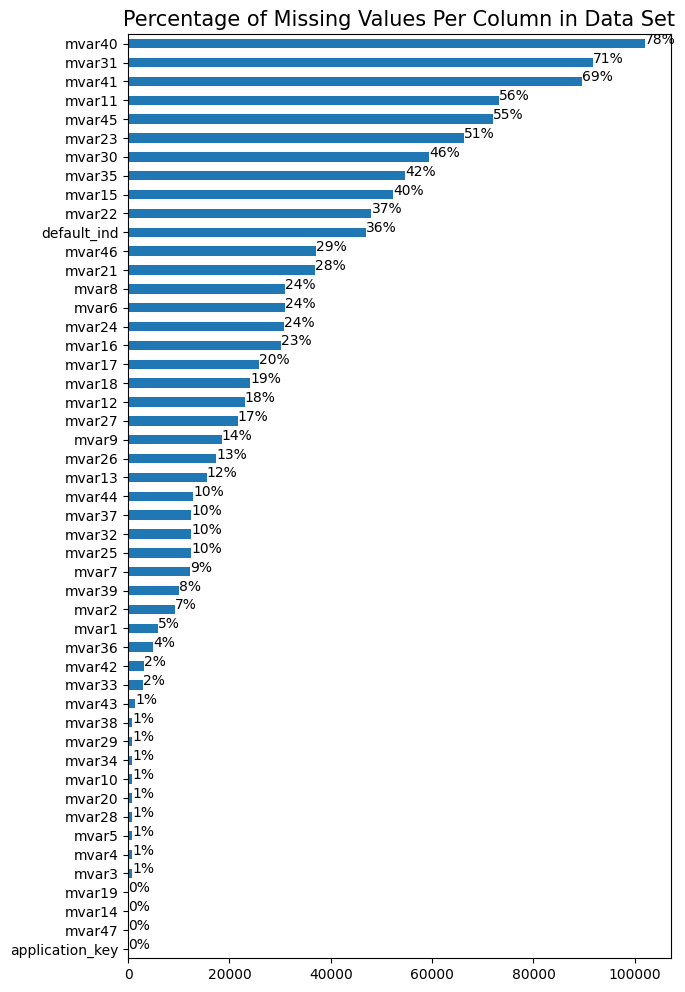

In [17]:
# Check if there any missing values in dataset

fig = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (7, 12))
plt.title('Percentage of Missing Values Per Column in Data Set', fontdict={'size':15})
for p in fig.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    fig.annotate(percentage,(x,y))
plt.show()


### Drop features with high missing value percentage (>60%)

In [18]:
df.drop(['mvar40','mvar41','mvar31'],axis=1,inplace=True)

## Handling missing values in numerical features

In [19]:
# collecting all numerical features 

cont_features=[feature for feature in df.columns if df[feature].dtype!="O" and feature not in ["default_ind"]]
cont_features

['application_key',
 'mvar1',
 'mvar2',
 'mvar3',
 'mvar4',
 'mvar5',
 'mvar6',
 'mvar7',
 'mvar8',
 'mvar9',
 'mvar10',
 'mvar11',
 'mvar12',
 'mvar13',
 'mvar14',
 'mvar15',
 'mvar16',
 'mvar17',
 'mvar18',
 'mvar19',
 'mvar20',
 'mvar21',
 'mvar22',
 'mvar23',
 'mvar24',
 'mvar25',
 'mvar26',
 'mvar27',
 'mvar28',
 'mvar29',
 'mvar30',
 'mvar32',
 'mvar33',
 'mvar34',
 'mvar35',
 'mvar36',
 'mvar37',
 'mvar38',
 'mvar39',
 'mvar42',
 'mvar43',
 'mvar44',
 'mvar45',
 'mvar46']

In [20]:
# collecting all missing features from numerical features 

missing_cont=[feature for feature in cont_features if df[feature].isnull().sum()>=1]
missing_cont

['mvar1',
 'mvar2',
 'mvar3',
 'mvar4',
 'mvar5',
 'mvar6',
 'mvar7',
 'mvar8',
 'mvar9',
 'mvar10',
 'mvar11',
 'mvar12',
 'mvar13',
 'mvar15',
 'mvar16',
 'mvar17',
 'mvar18',
 'mvar19',
 'mvar20',
 'mvar21',
 'mvar22',
 'mvar23',
 'mvar24',
 'mvar25',
 'mvar26',
 'mvar27',
 'mvar28',
 'mvar29',
 'mvar30',
 'mvar32',
 'mvar33',
 'mvar34',
 'mvar35',
 'mvar36',
 'mvar37',
 'mvar38',
 'mvar39',
 'mvar42',
 'mvar43',
 'mvar44',
 'mvar45',
 'mvar46']

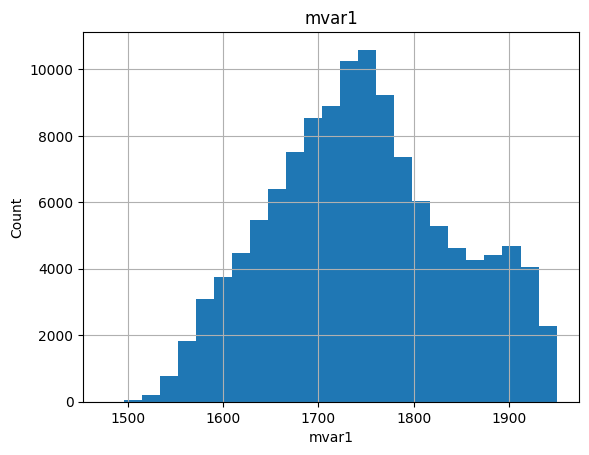

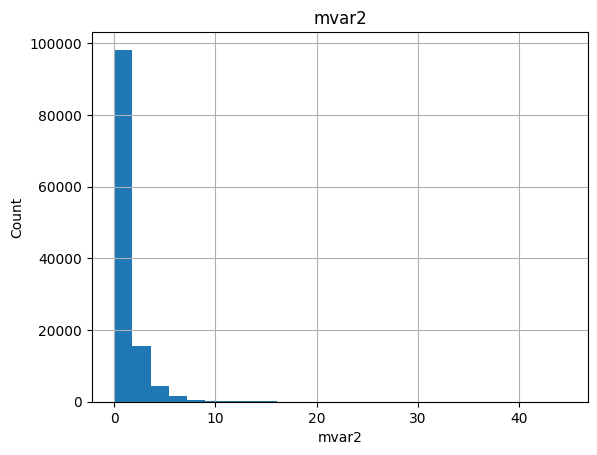

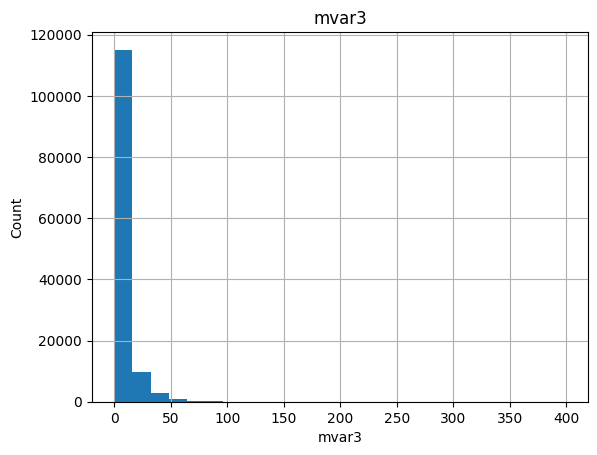

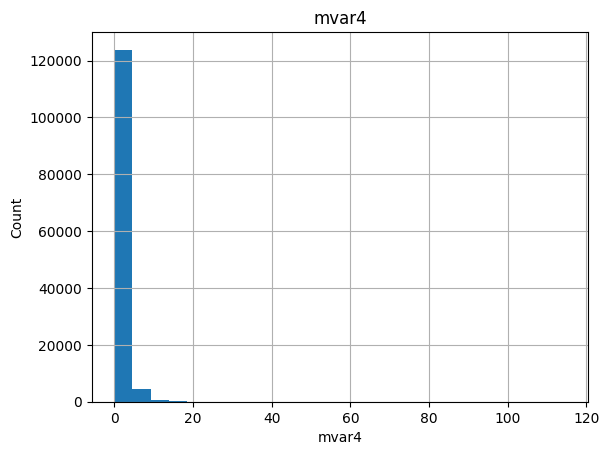

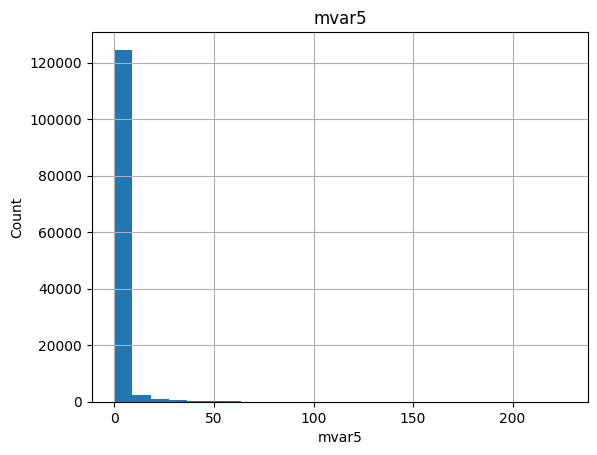

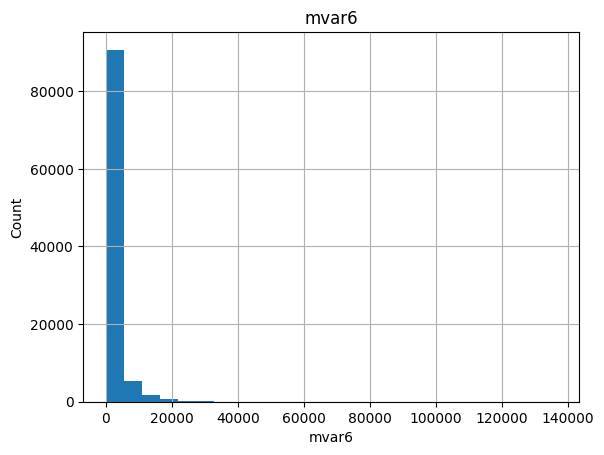

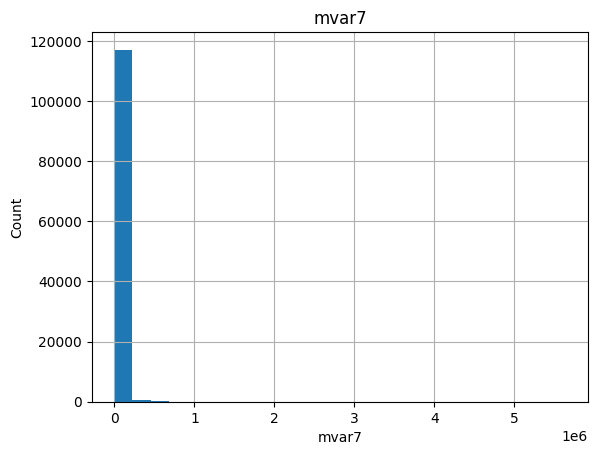

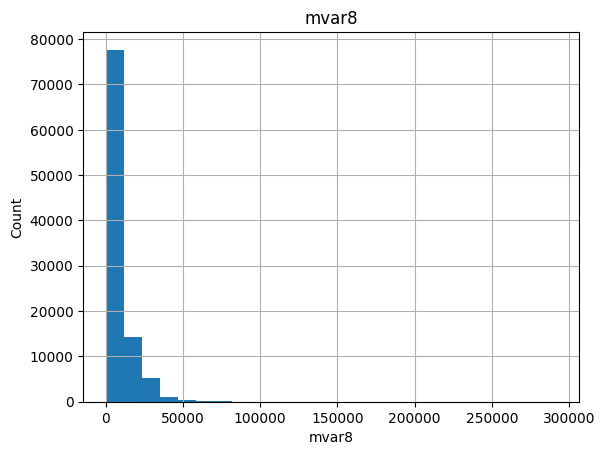

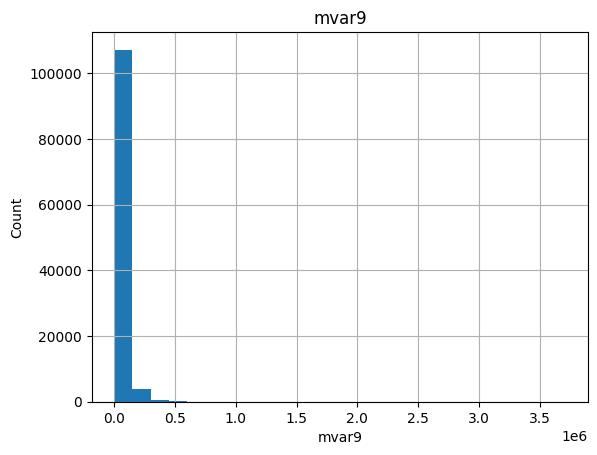

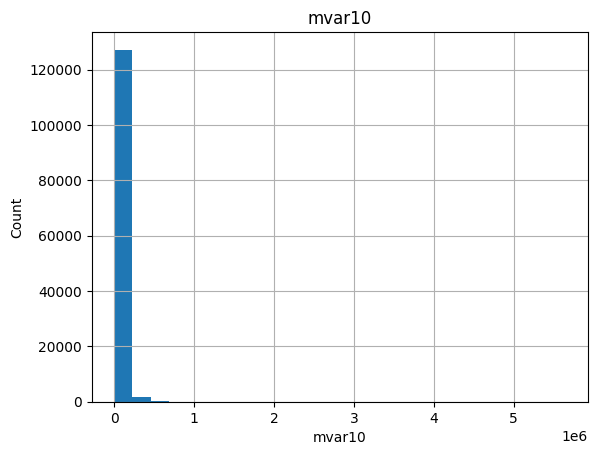

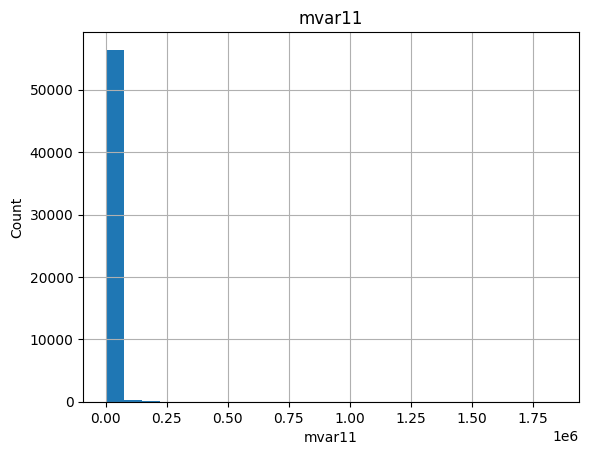

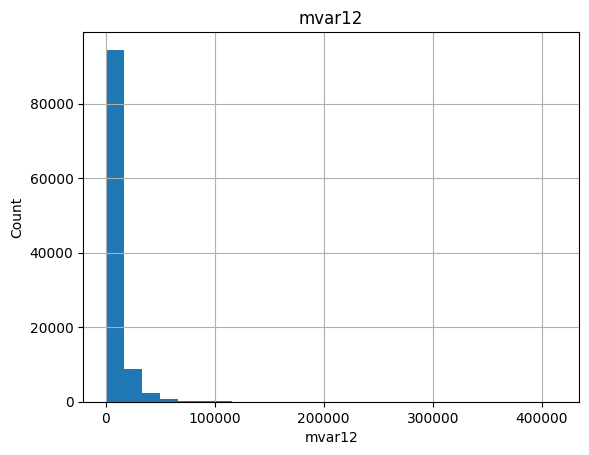

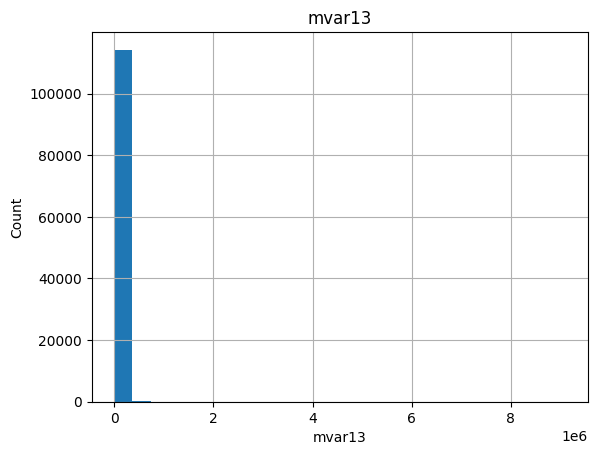

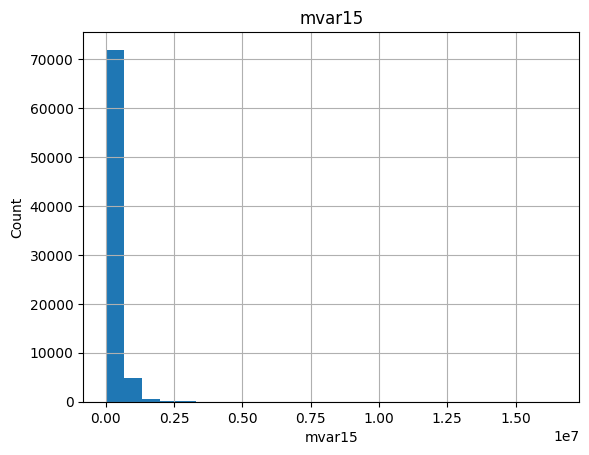

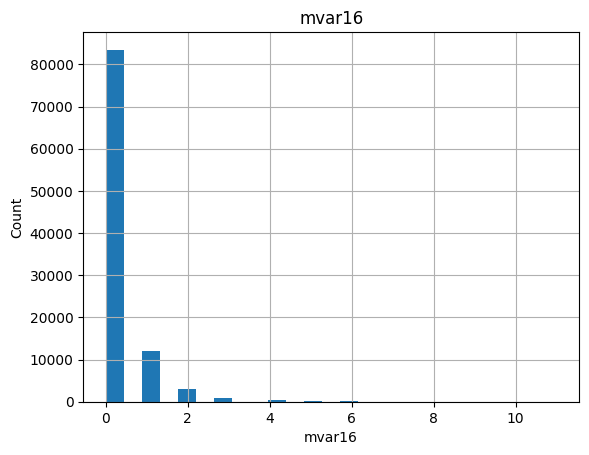

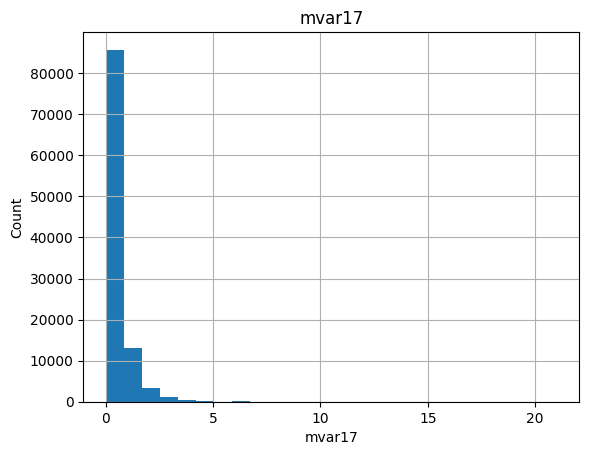

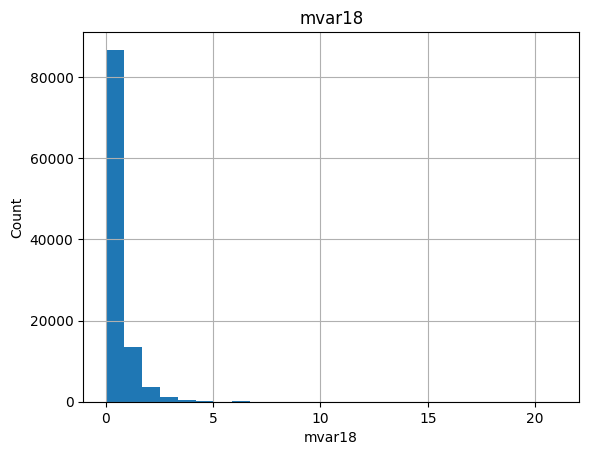

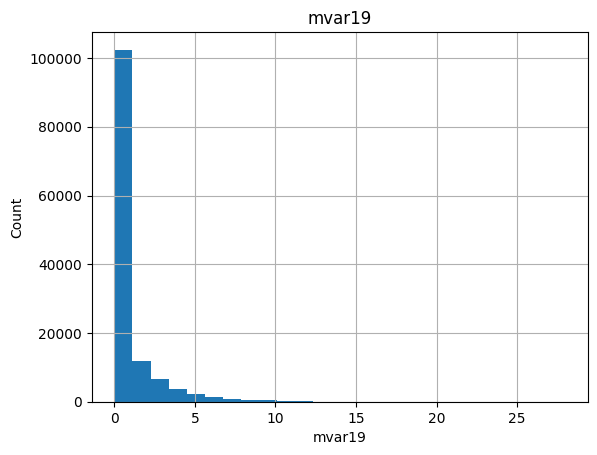

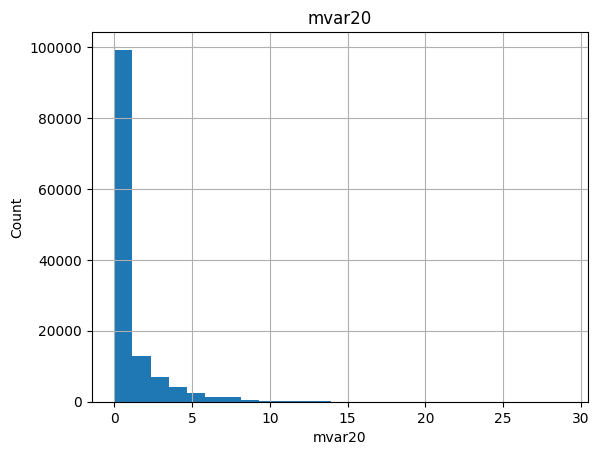

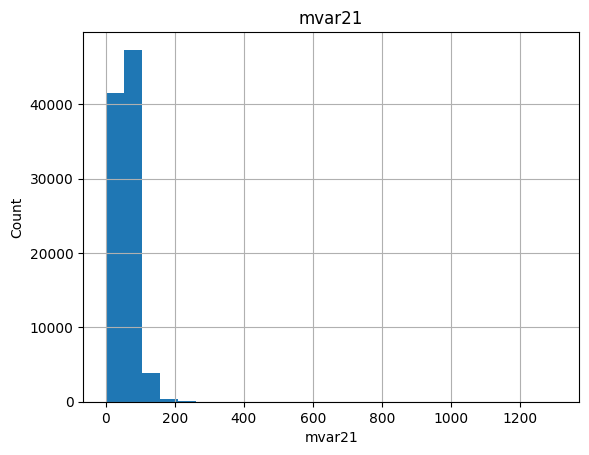

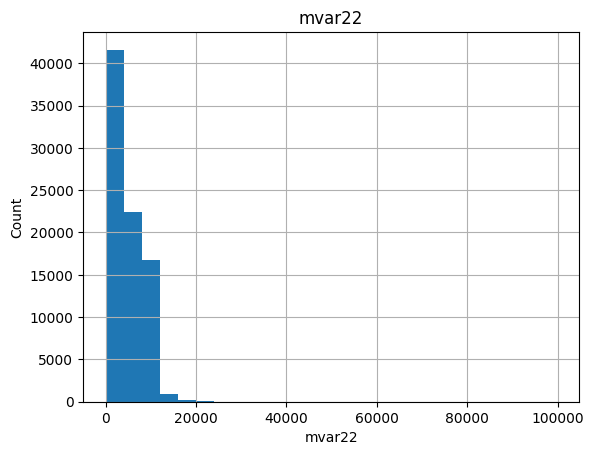

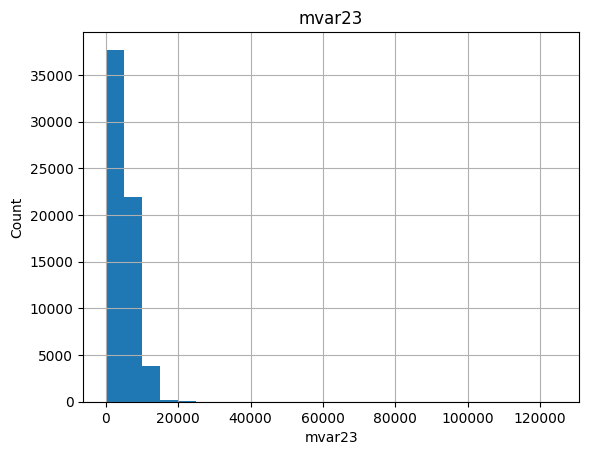

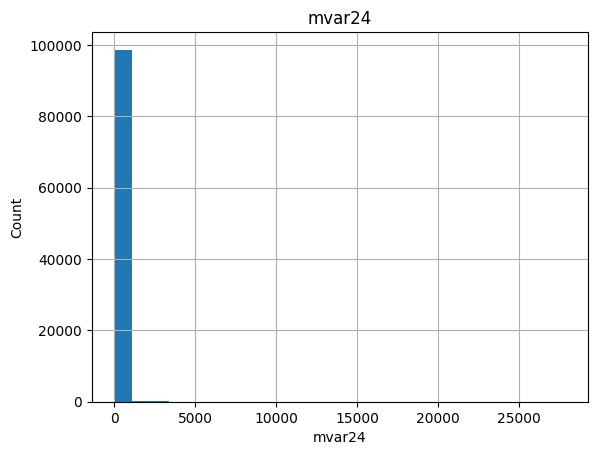

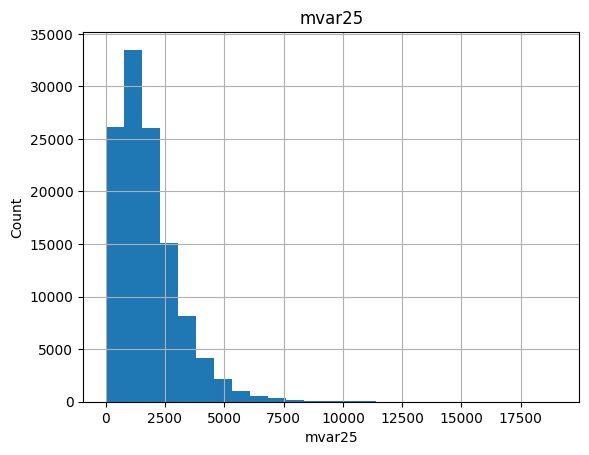

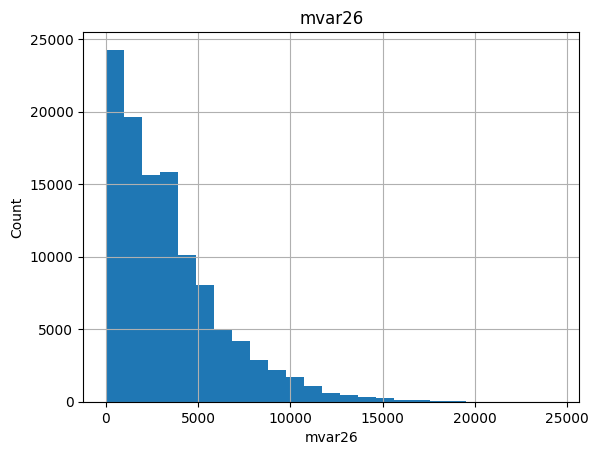

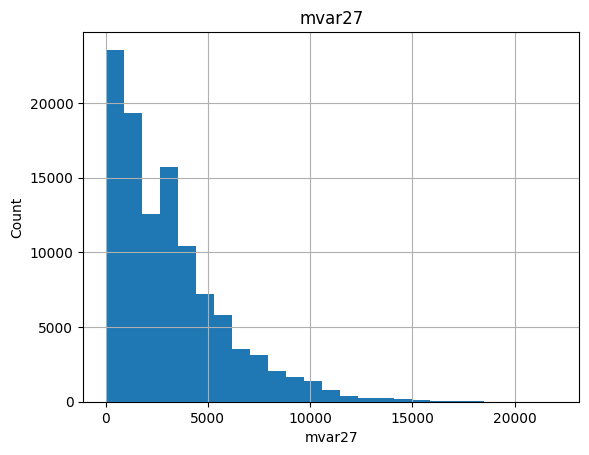

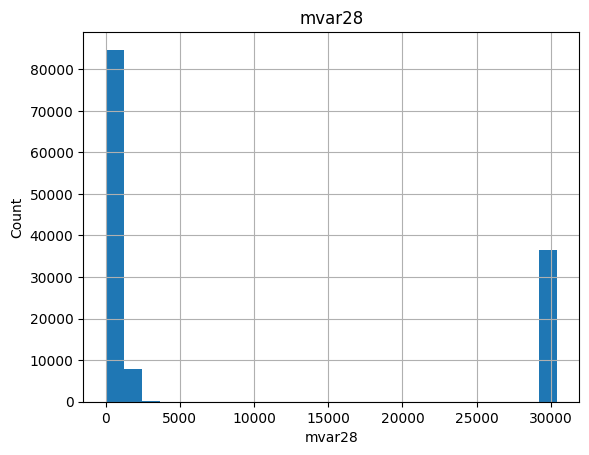

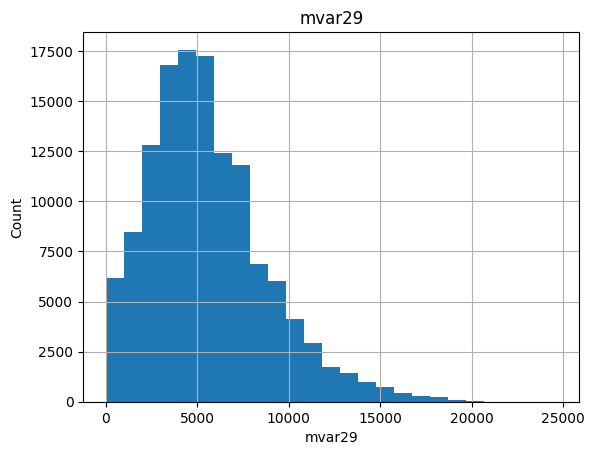

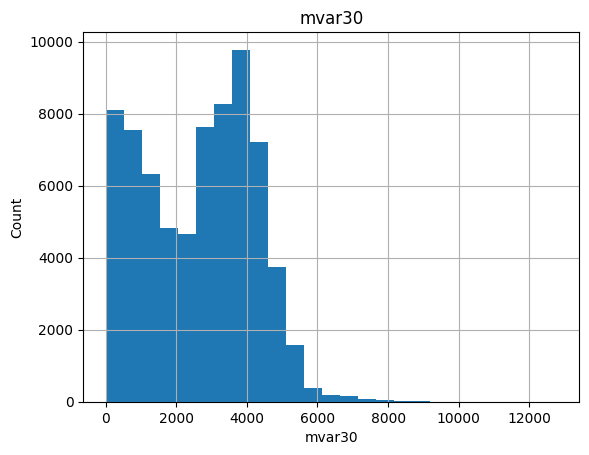

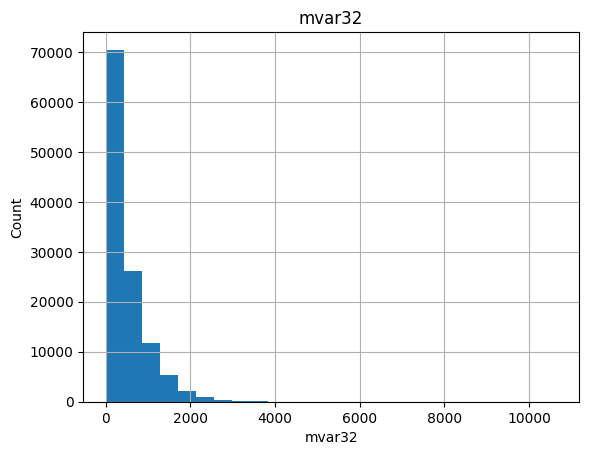

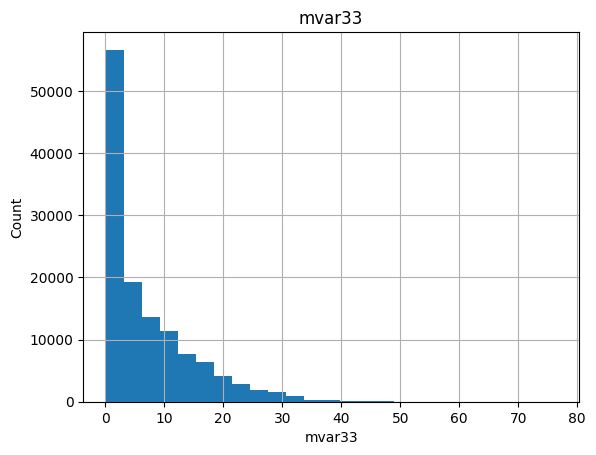

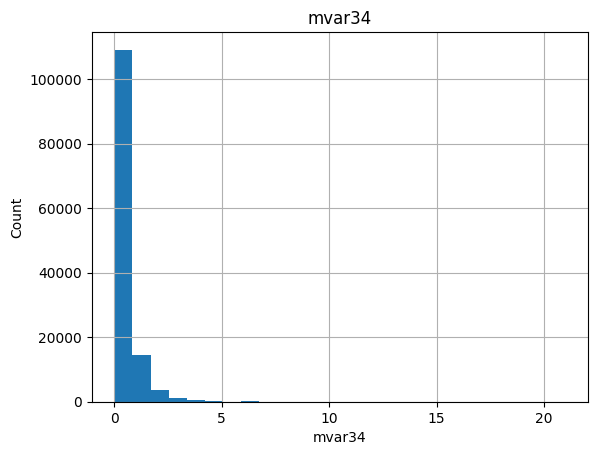

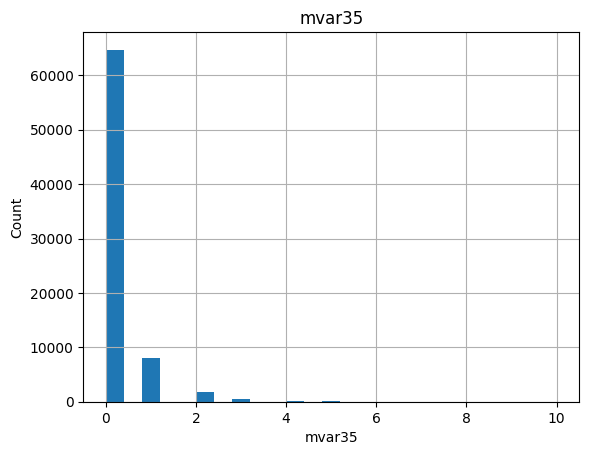

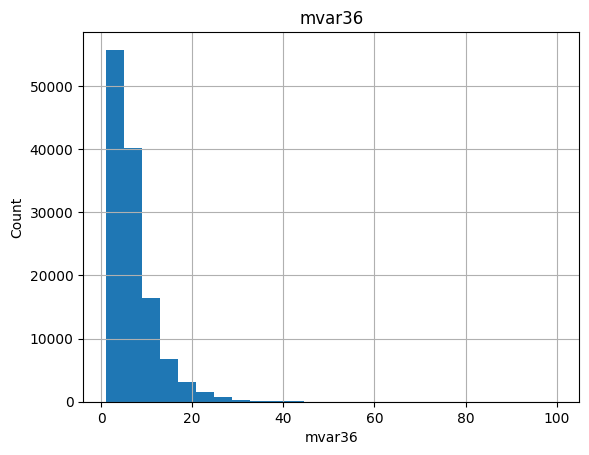

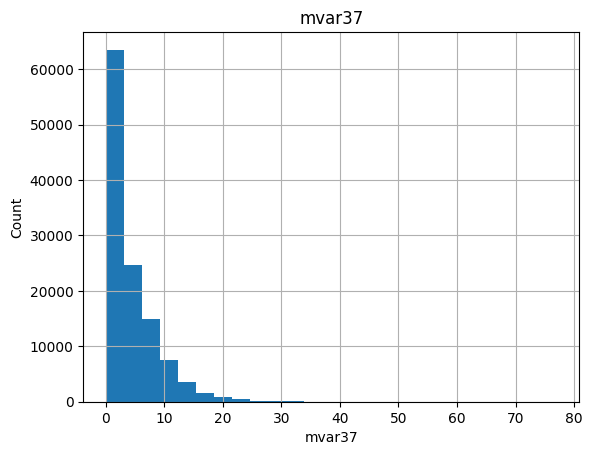

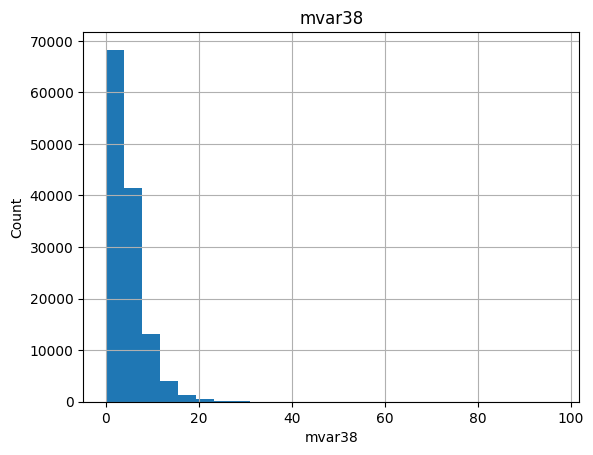

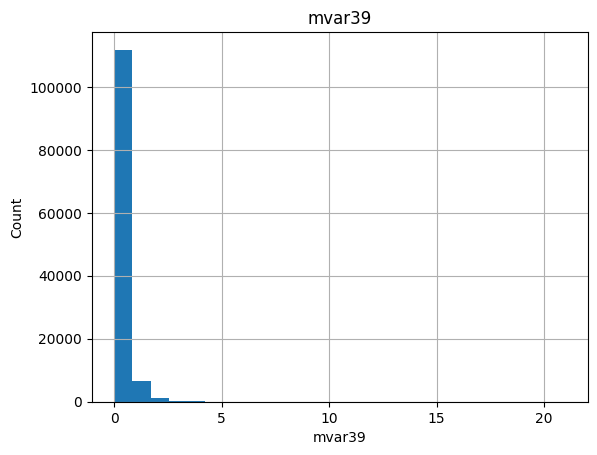

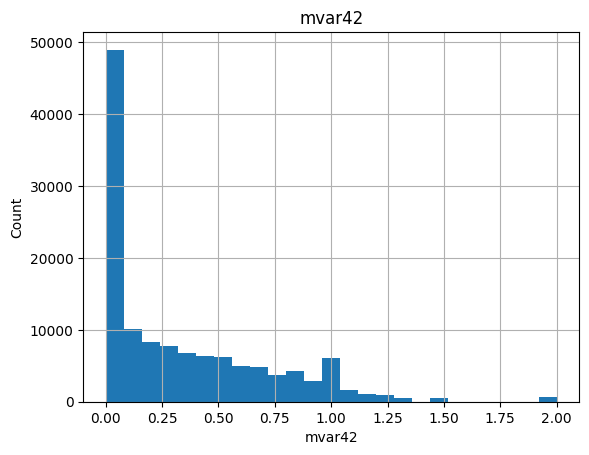

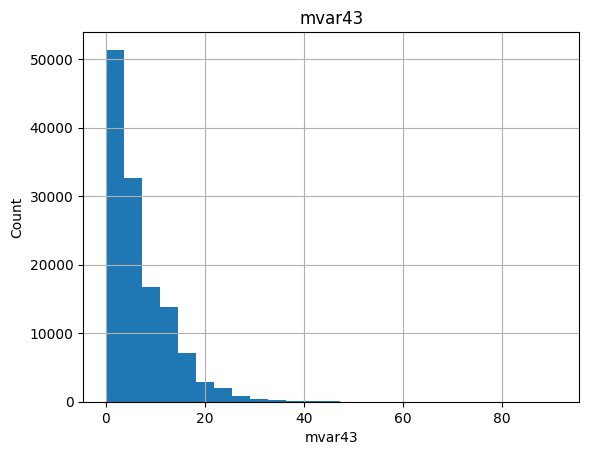

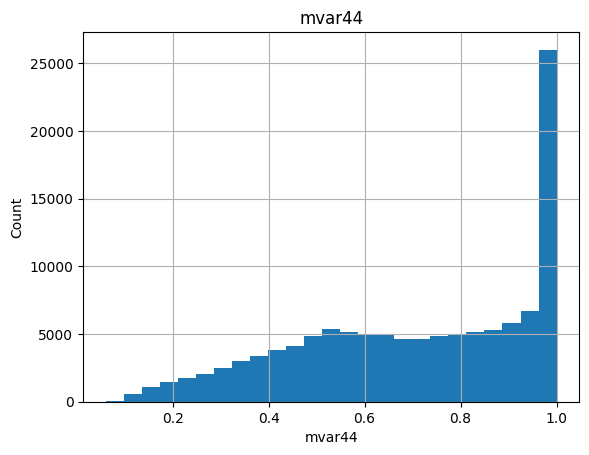

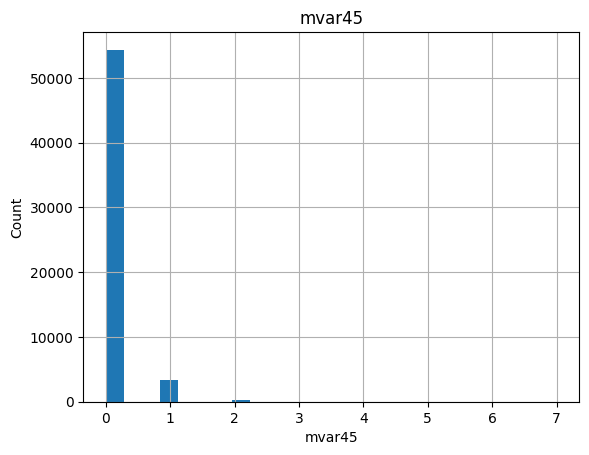

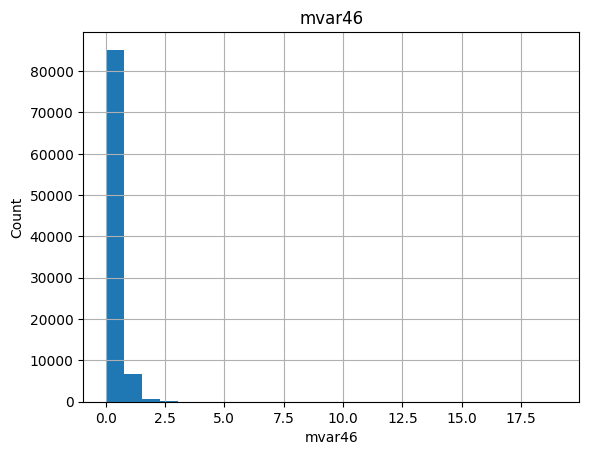

In [106]:
# Analyzing the distribution of missing features

for feature in missing_cont:
    data1=df.copy()
    data1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

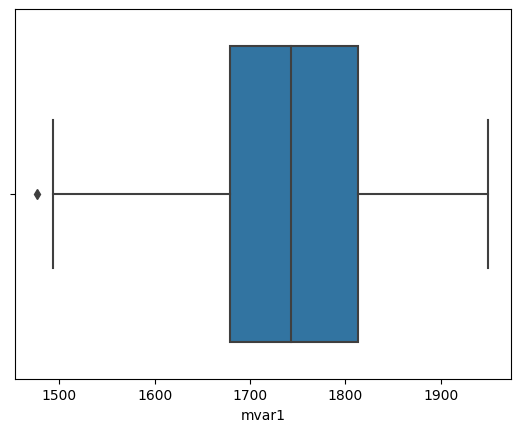

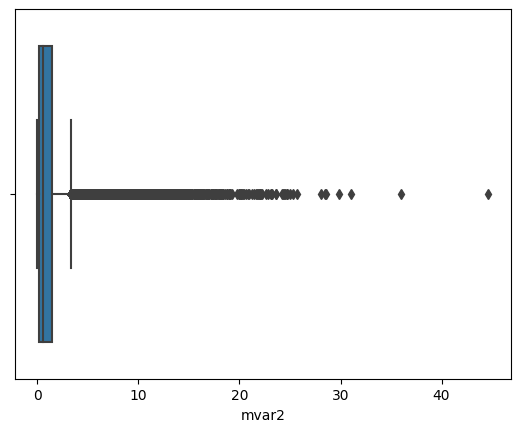

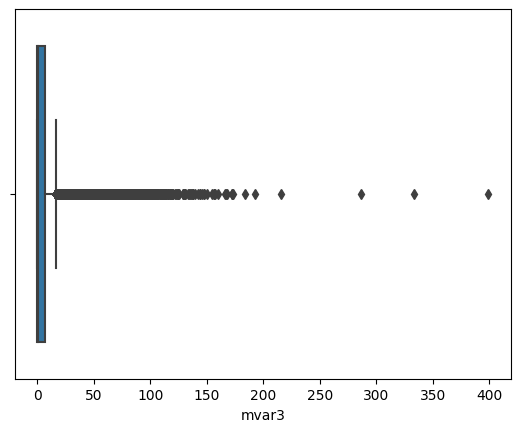

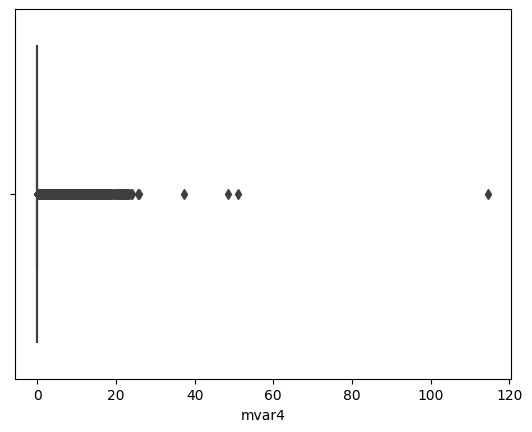

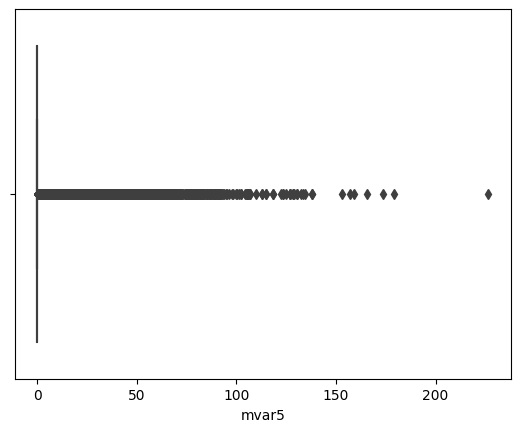

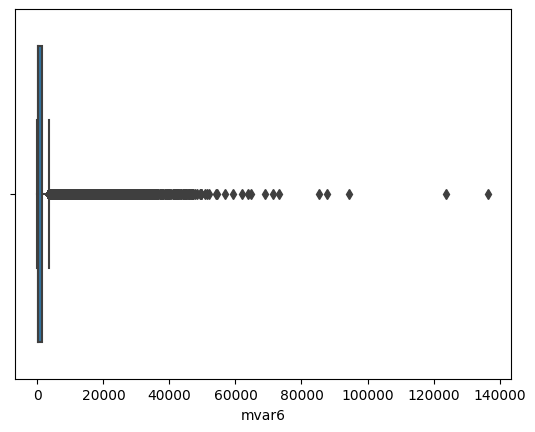

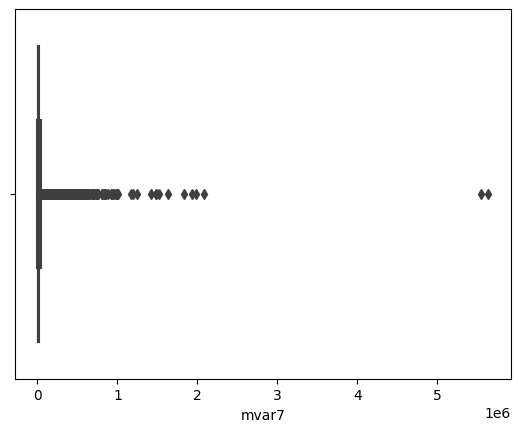

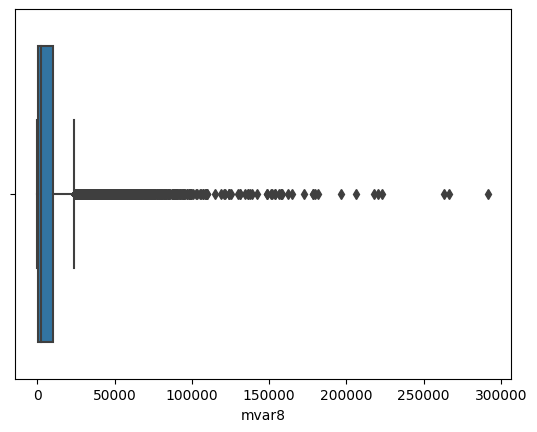

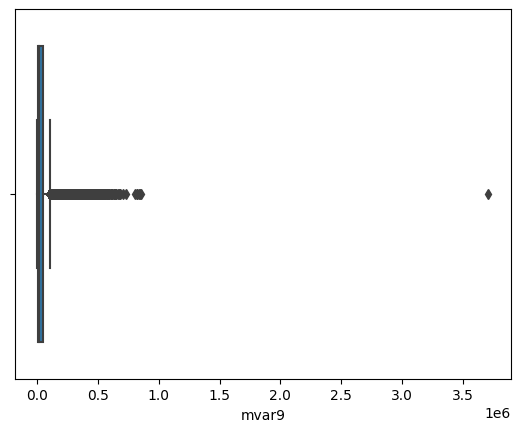

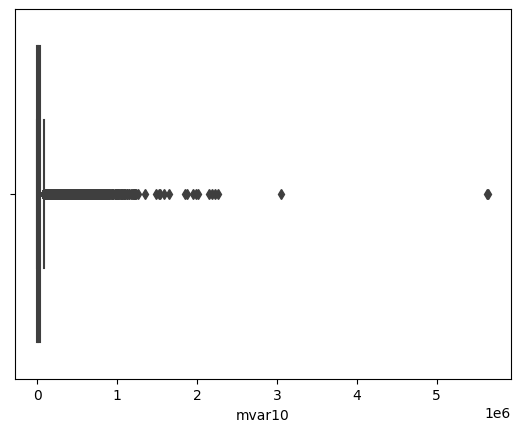

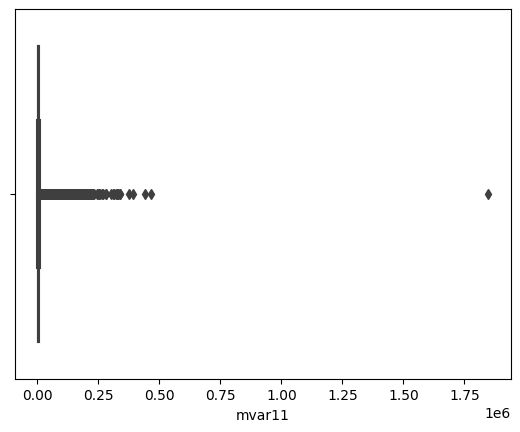

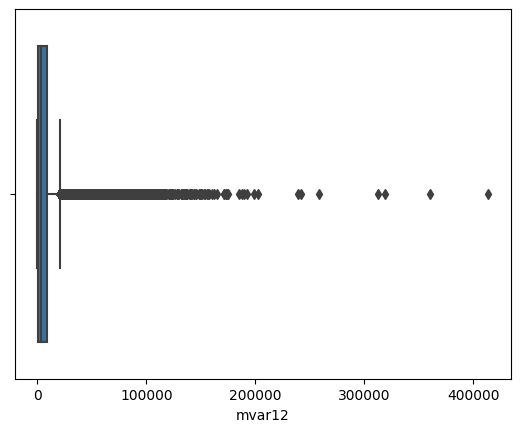

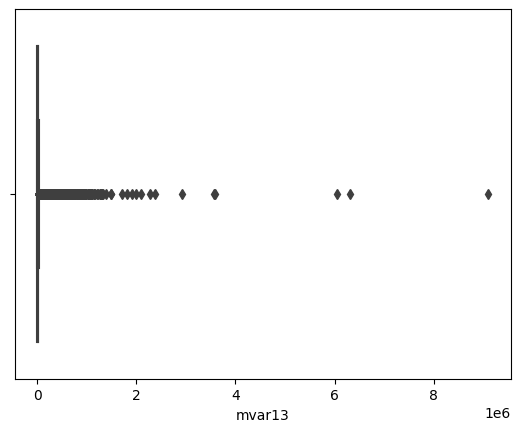

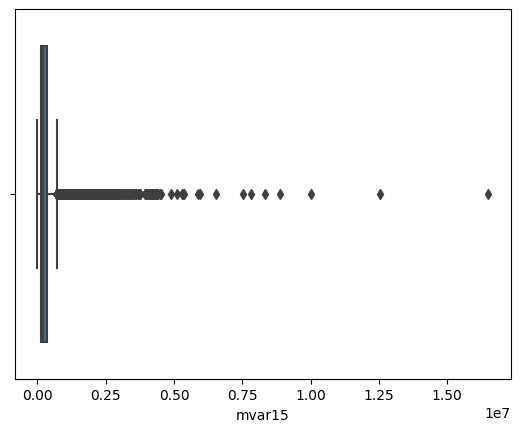

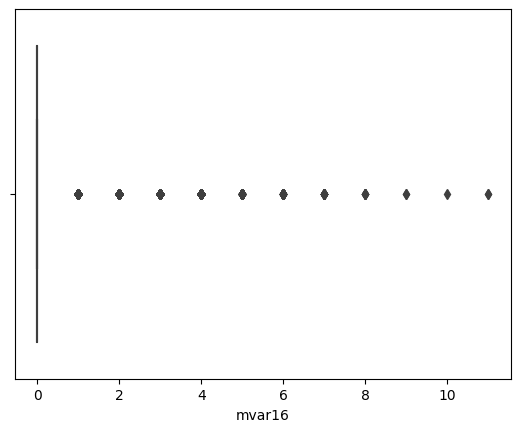

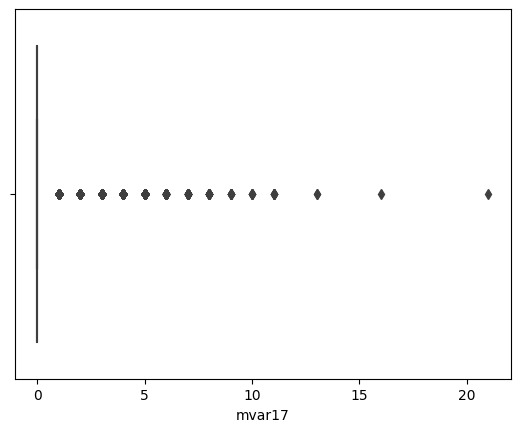

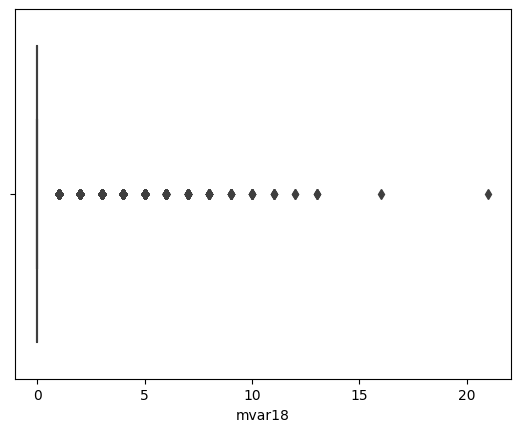

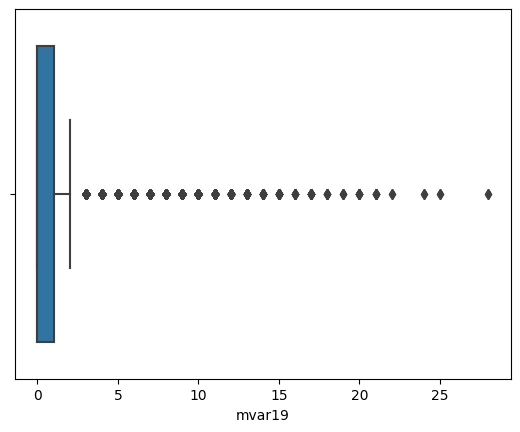

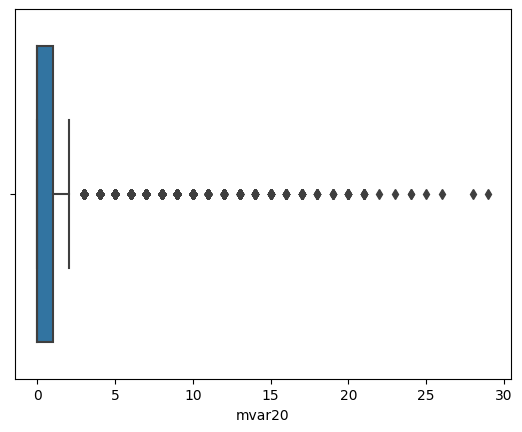

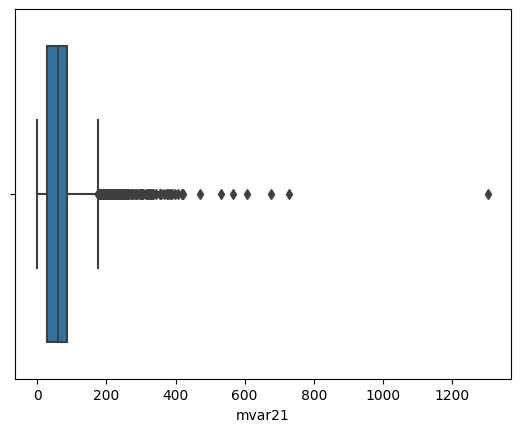

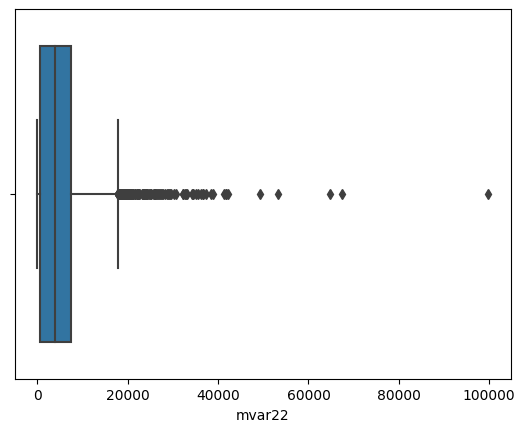

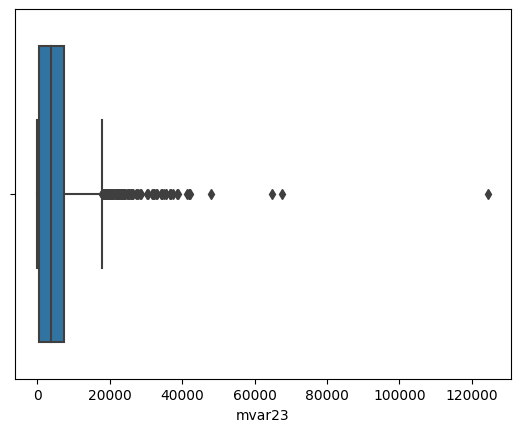

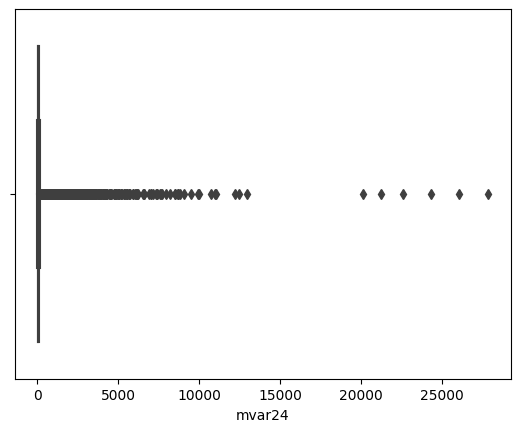

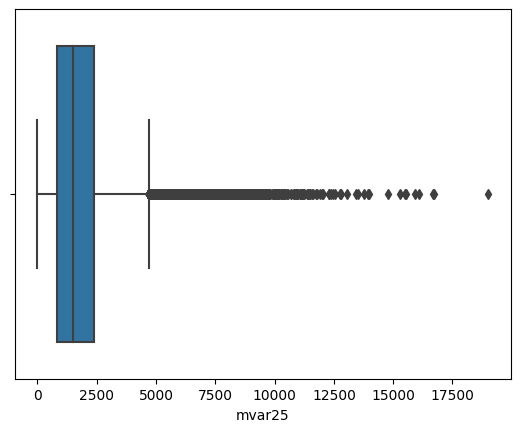

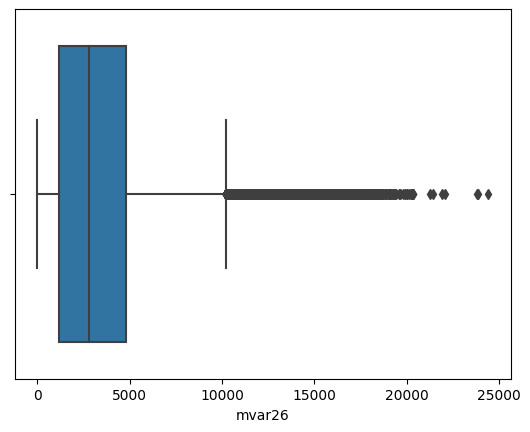

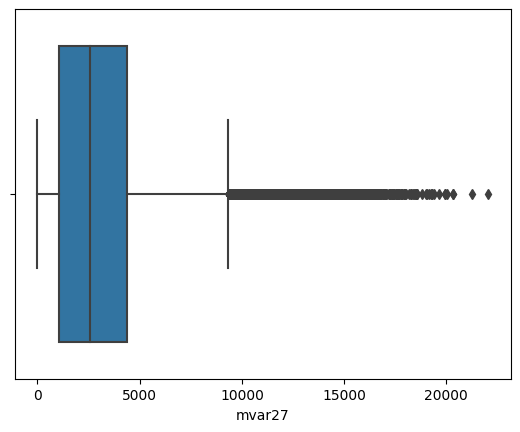

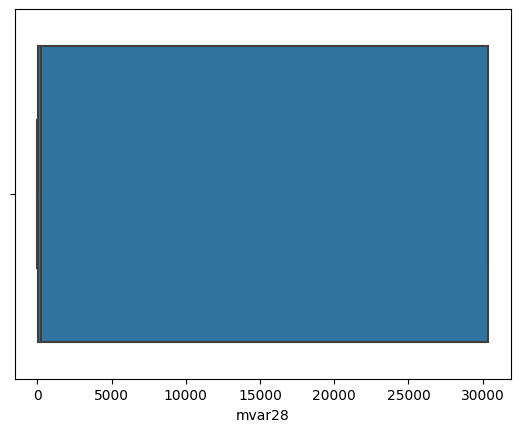

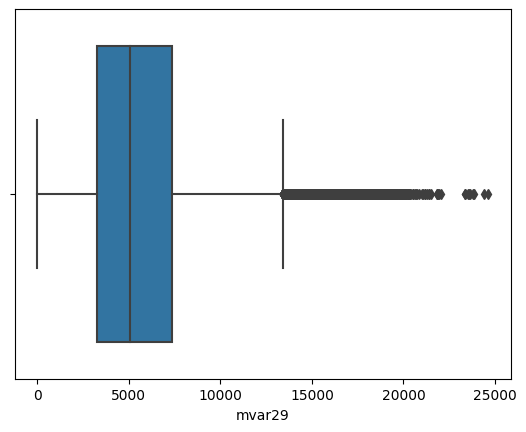

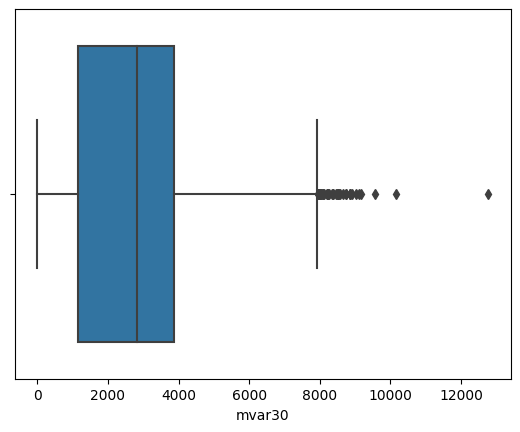

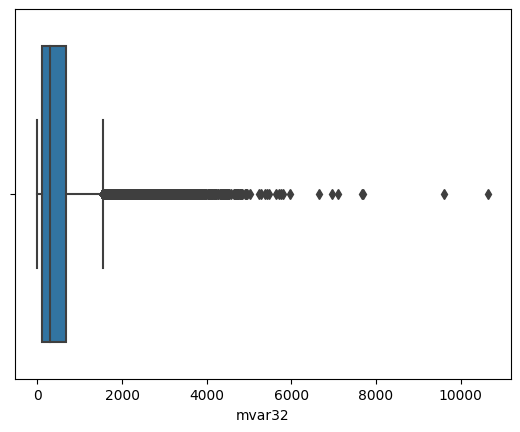

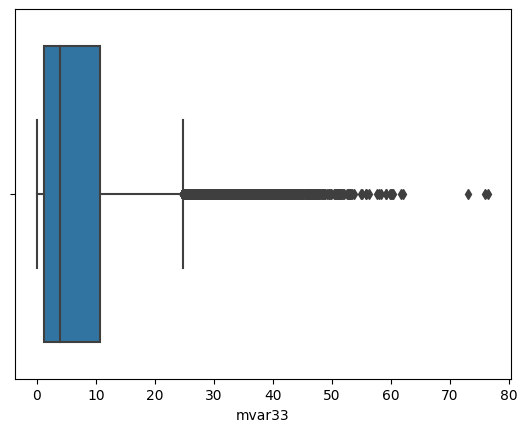

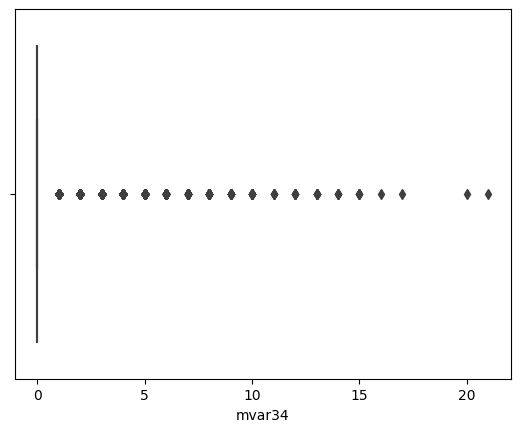

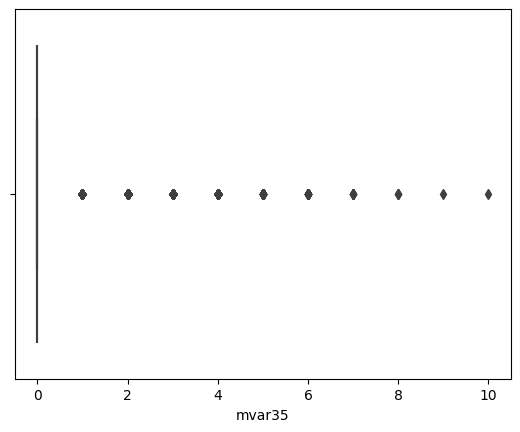

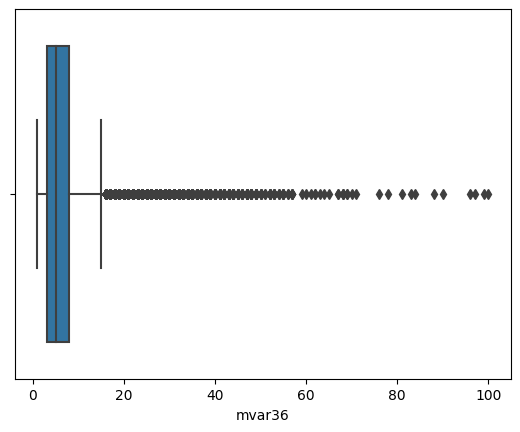

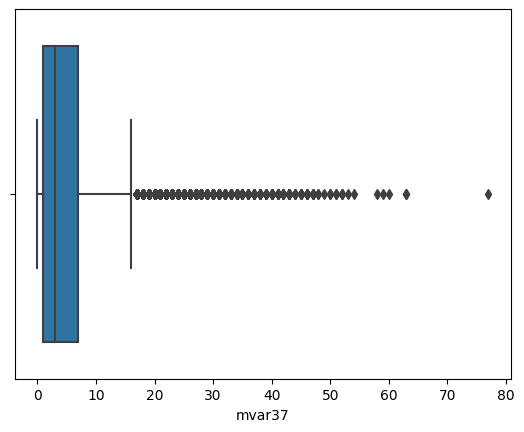

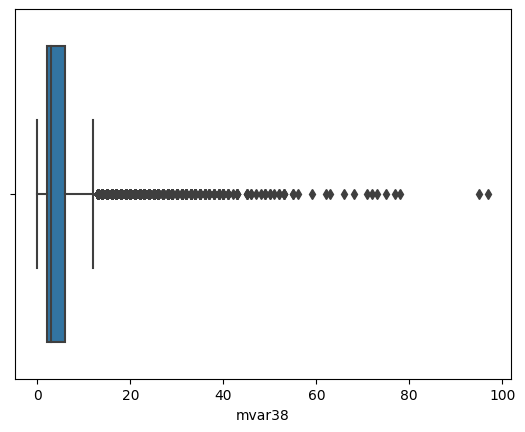

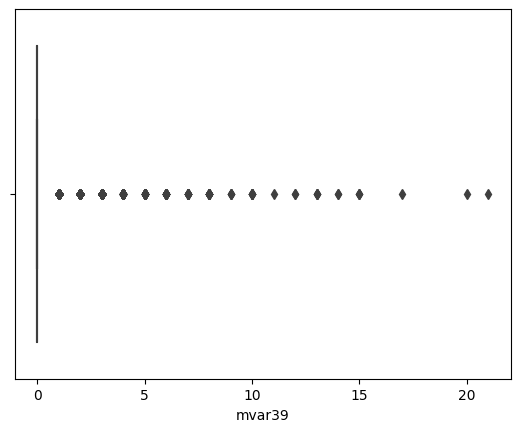

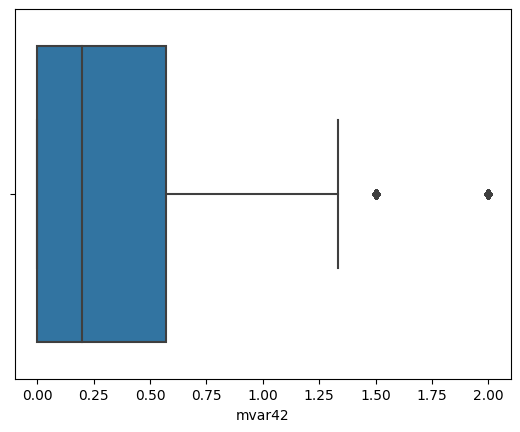

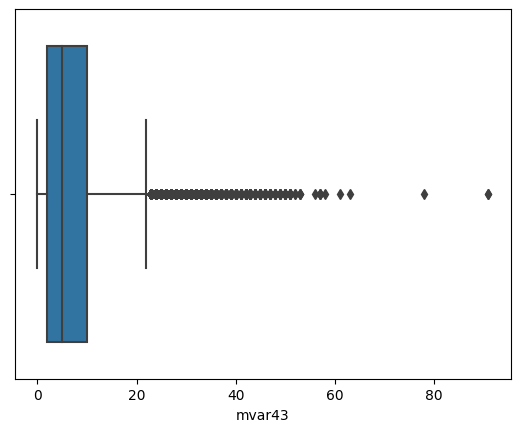

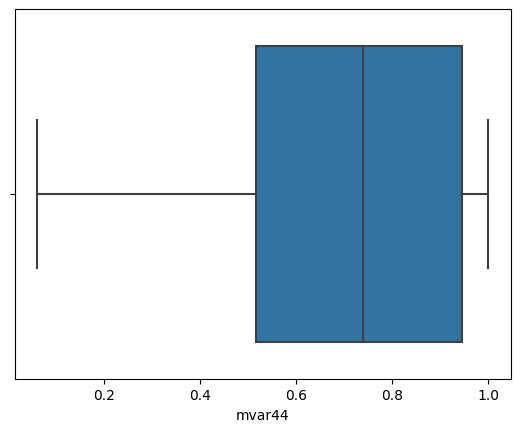

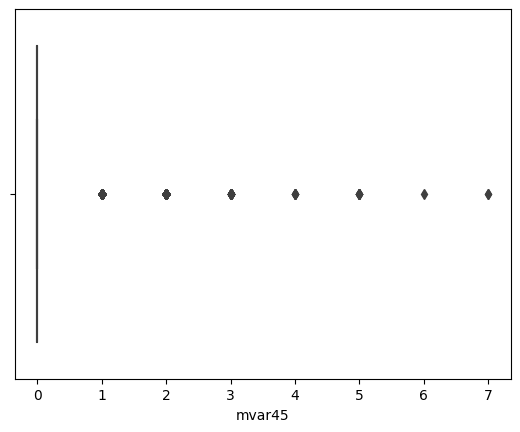

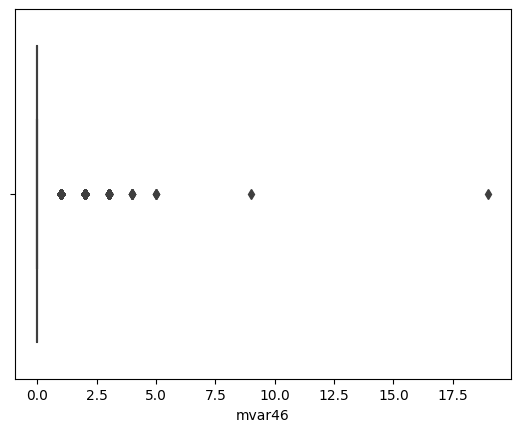

In [17]:
# Checking for ouliers in the missing numerical features

for feature in missing_cont:
    sns.boxplot(df[feature])
    plt.show()

### As the box plots show that there a lot of outliers except in "mvar1" and also the distributions being not Normal, replacement with mean would be inappropriate. We should be using median

In [21]:
# The mean and the median of "mvar1" is very close because this feature is following a normal distribution. So all missing features can be replaced with median

print(df["mvar1"].median())
print(df["mvar1"].mean())

1743.0
1747.1541047573746


In [22]:
# Replacing the missing values in numerical fetaures with median 

for feature in missing_cont:
    median=df[feature].median()
    df[feature]=df[feature].fillna(median)
    print(df[feature].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## Handling missing values in categorical features

In [23]:
# Collecting categorical features with missing values

missing_cat=[feature for feature in df.columns if df[feature].dtype=='O' and df[feature].isnull().sum()>0]
missing_cat

# mvar47 is the only categorical feature and it doesnt have missing values

[]

In [24]:
# Calculating the percentage of defaulters in the dataset

df.default_ind.value_counts()[0]/(df.default_ind.value_counts()[0]+df.default_ind.value_counts()[1])

# 71% of the data is classified as non defaulters

0.7125903614457831

In [25]:
# for feature in missing_cont:
#     data=df.copy()
#     data[feature] = np.where(data[feature].isnull(), 1, 0)
#     data.groupby(feature)['default_ind'].count().plot.bar(figsize=(5,3))
#     plt.title(feature)
#     plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130000 entries, 0 to 46999
Data columns (total 46 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   application_key  130000 non-null  int64  
 1   mvar1            130000 non-null  float64
 2   mvar2            130000 non-null  float64
 3   mvar3            130000 non-null  float64
 4   mvar4            130000 non-null  float64
 5   mvar5            130000 non-null  float64
 6   mvar6            130000 non-null  float64
 7   mvar7            130000 non-null  float64
 8   mvar8            130000 non-null  float64
 9   mvar9            130000 non-null  float64
 10  mvar10           130000 non-null  float64
 11  mvar11           130000 non-null  float64
 12  mvar12           130000 non-null  float64
 13  mvar13           130000 non-null  float64
 14  mvar14           130000 non-null  int64  
 15  mvar15           130000 non-null  float64
 16  mvar16           130000 non-null  float

#### All missing values are handled 

application_key
mvar1
mvar2
mvar3
mvar4
mvar5
mvar6
mvar7
mvar8
mvar9
mvar10
mvar11
mvar12
mvar13
mvar14
mvar15
mvar16
mvar17
mvar18
mvar19
mvar20
mvar21
mvar22
mvar23
mvar24
mvar25
mvar26
mvar27
mvar28
mvar29
mvar30
mvar32
mvar33
mvar34
mvar35
mvar36
mvar37
mvar38
mvar39
mvar42
mvar43
mvar44
mvar45
mvar46
mvar47
default_ind


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


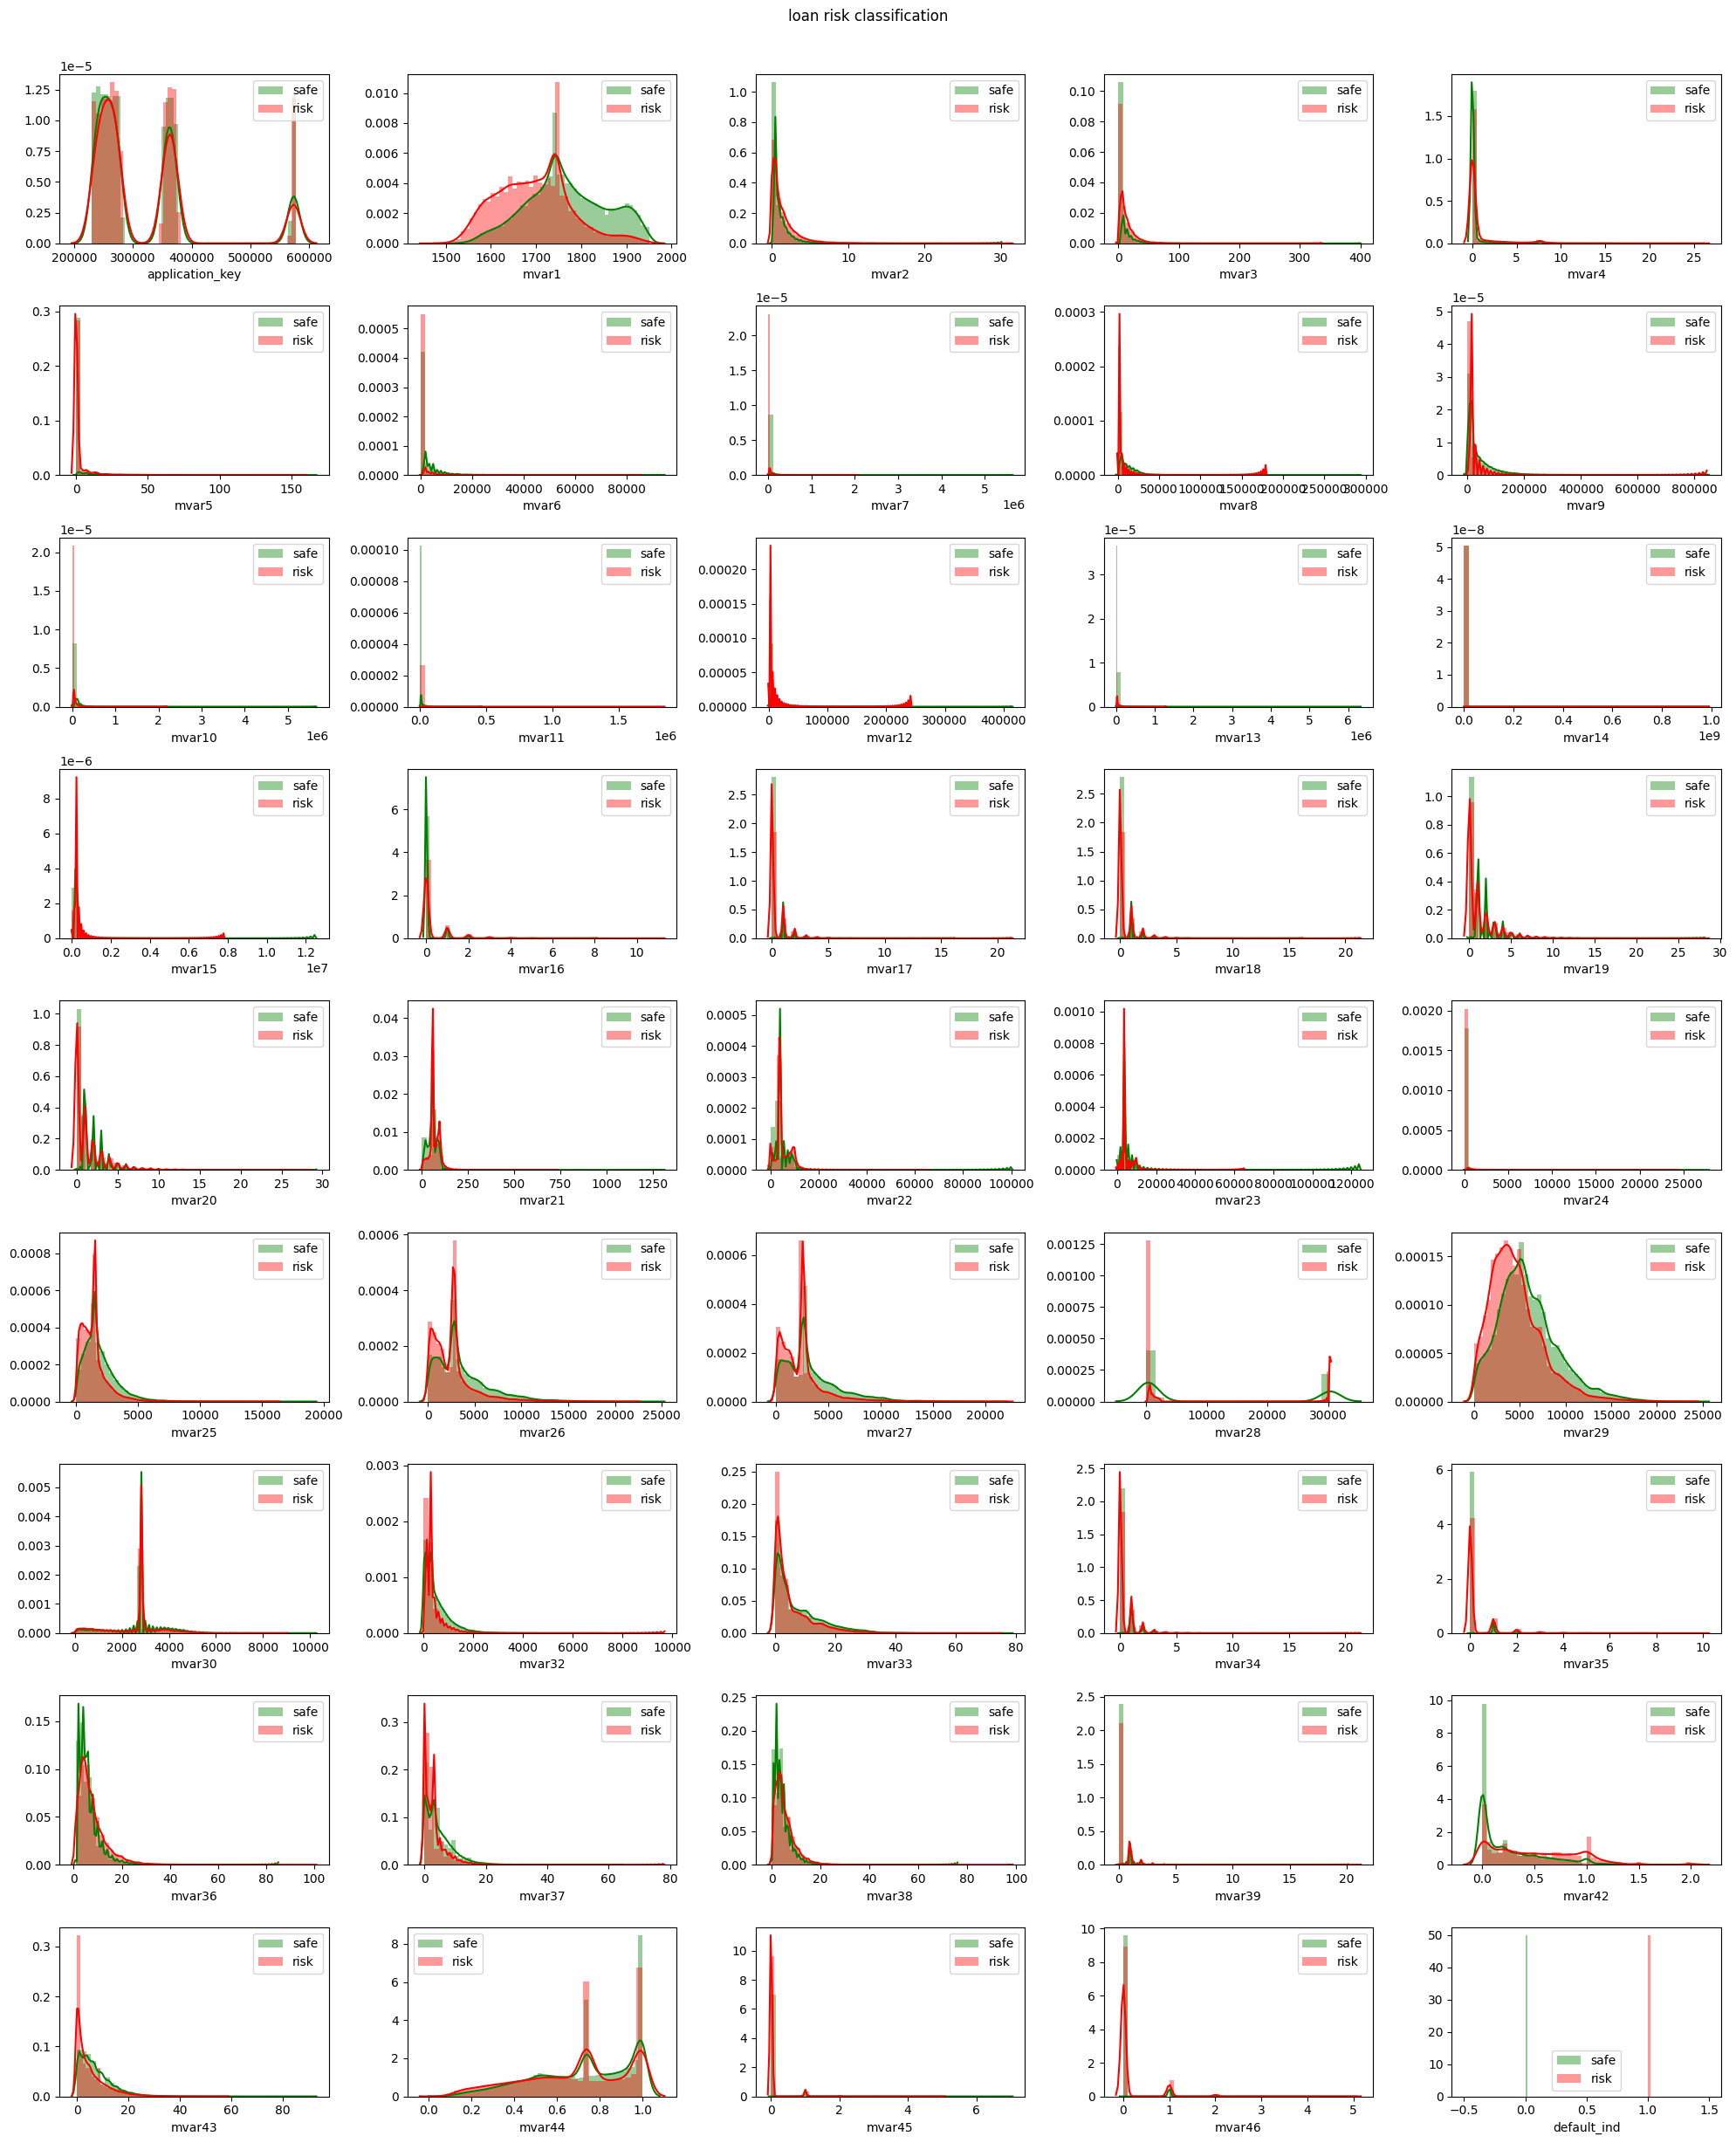

In [24]:
train=df[:83000]
fig = plt.figure(figsize = (20, 25))
j = 0
for i in train.columns:
    print(i)
    if i!='mvar47':
        plt.subplot(9, 5, j+1)
        j += 1
        sns.distplot(train[i][train['default_ind']==0], color='g', label = 'safe')
        sns.distplot(train[i][train['default_ind']==1], color='r', label = 'risk')
        plt.legend(loc='best')
fig.suptitle('loan risk classification')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [25]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130000 entries, 0 to 46999
Data columns (total 46 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   application_key  130000 non-null  int64  
 1   mvar1            130000 non-null  float64
 2   mvar2            130000 non-null  float64
 3   mvar3            130000 non-null  float64
 4   mvar4            130000 non-null  float64
 5   mvar5            130000 non-null  float64
 6   mvar6            130000 non-null  float64
 7   mvar7            130000 non-null  float64
 8   mvar8            130000 non-null  float64
 9   mvar9            130000 non-null  float64
 10  mvar10           130000 non-null  float64
 11  mvar11           130000 non-null  float64
 12  mvar12           130000 non-null  float64
 13  mvar13           130000 non-null  float64
 14  mvar14           130000 non-null  int64  
 15  mvar15           130000 non-null  float64
 16  mvar16           130000 non-null  float

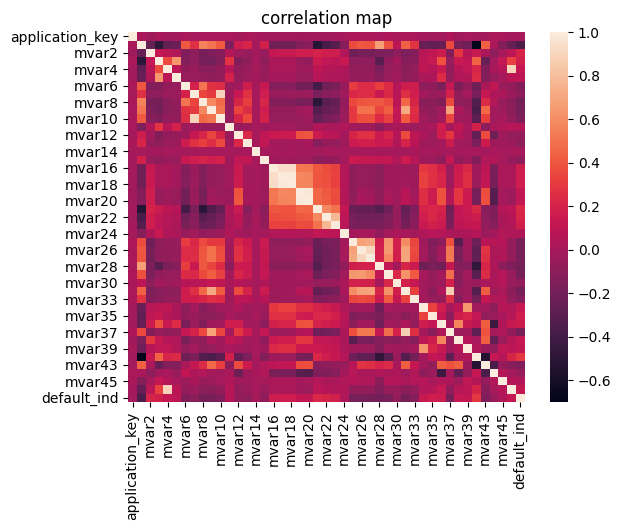

In [27]:
sns.heatmap(df.corr())
plt.title('correlation map')
plt.show()

In [27]:
df.nunique() 

application_key    130000
mvar1                 457
mvar2               31149
mvar3               24289
mvar4                6535
mvar5                5897
mvar6                9397
mvar7               36981
mvar8               20409
mvar9               41870
mvar10              54300
mvar11              14826
mvar12              24979
mvar13              36148
mvar14               2215
mvar15              51337
mvar16                 12
mvar17                 15
mvar18                 16
mvar19                 26
mvar20                 29
mvar21              34429
mvar22              48570
mvar23              33060
mvar24              16155
mvar25               5941
mvar26                644
mvar27                599
mvar28                103
mvar29                691
mvar30                288
mvar32               3108
mvar33                616
mvar34                 20
mvar35                 11
mvar36                 80
mvar37                 60
mvar38                 68
mvar39      

# Feature Engineering

## Encoding Categorical variable

In [28]:
## As there is only one categrocial variable, let us encode based on counts, highest gets 1

df["mvar47"].value_counts()

C    82535
L    47465
Name: mvar47, dtype: int64

In [29]:
clean={"mvar47":{"C":1,"L":0}}

In [30]:
df=df.replace(clean)

In [31]:
ID=df[['application_key']]
df.drop(columns=['application_key'],inplace=True)

In [32]:
df.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,1794.0,6423.0,3067.0,123875,216386.0,1.0,1.0,1.0,3.0,3.0,94.78,8987.180,3632.48,72.250,1462.0,4532.0,2890.0,61.0,4532.0,1095.0,625.0,1.1667,1.0,0.0,8.0,10.0,4.0,1.0,0.08696,10.0,0.63899,0.0,0.0,1,0.0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,1794.0,765.0,1931.0,42613,216386.0,0.0,0.0,0.0,0.0,0.0,74.25,953.060,953.06,4.800,1028.0,2099.0,2099.0,30386.0,2281.0,2829.0,169.0,0.4167,0.0,0.0,8.0,0.0,2.0,0.0,0.00000,13.0,0.63836,0.0,0.0,0,1.0
2,1745.0,0.4001,0.000,0.0,0.0,297.0,2536.0,2504.0,14518.0,2536.0,1794.0,2962.0,4351.0,76109,216386.0,0.0,0.0,0.0,0.0,0.0,59.24,3887.535,3632.48,39.835,1497.0,2768.0,2585.0,669.0,4623.0,3772.0,308.0,25.0833,0.0,0.0,1.0,3.0,1.0,0.0,0.00000,1.0,1.00000,0.0,0.0,1,1.0
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,1794.0,0.0,0.0,84235,216386.0,0.0,0.0,0.0,0.0,0.0,59.24,0.000,3632.48,0.000,1308.0,2525.0,791.0,91.0,5992.0,2829.0,215.0,10.3333,0.0,0.0,3.0,3.0,2.0,0.0,0.15385,3.0,0.53241,0.0,0.0,0,0.0
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,1794.0,2257.0,27815.0,123875,524848.0,0.0,0.0,0.0,0.0,0.0,20.51,796.670,3632.48,28.720,801.0,2281.0,2281.0,487.0,2707.0,2829.0,158.0,0.9167,0.0,0.0,2.0,3.0,2.0,0.0,0.00000,1.0,0.92665,0.0,0.0,0,0.0


## Convert numerical features with less unique values to discrete fetaures

In [33]:
discrete_features=[feature for feature in df.columns if df[feature].nunique()<100 and feature !='default_ind']
print(discrete_features)
print(len(discrete_features),len(df.columns))

['mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar34', 'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar43', 'mvar45', 'mvar46', 'mvar47']
15 45


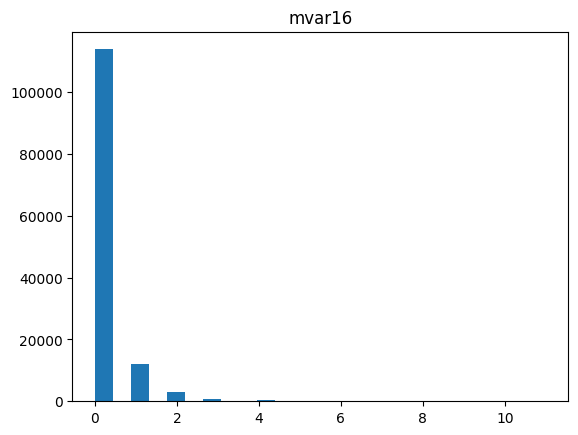

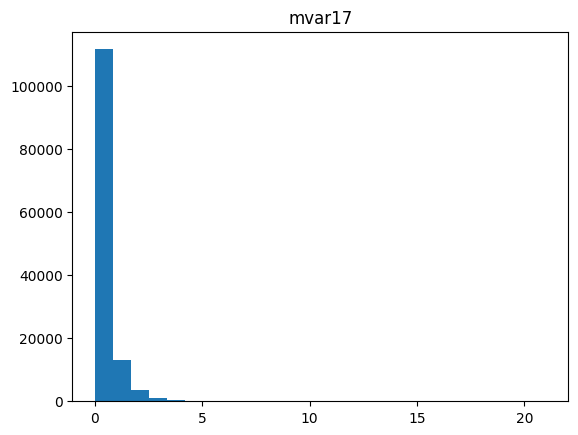

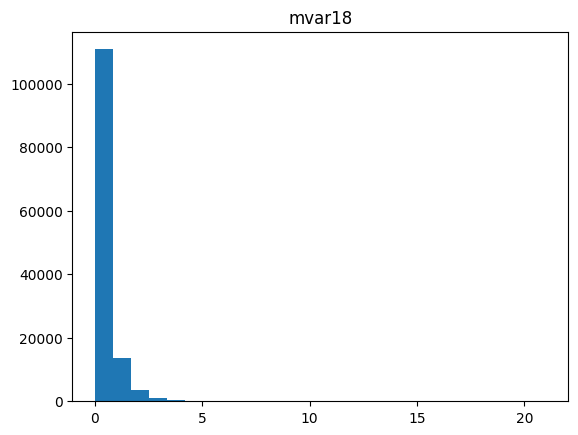

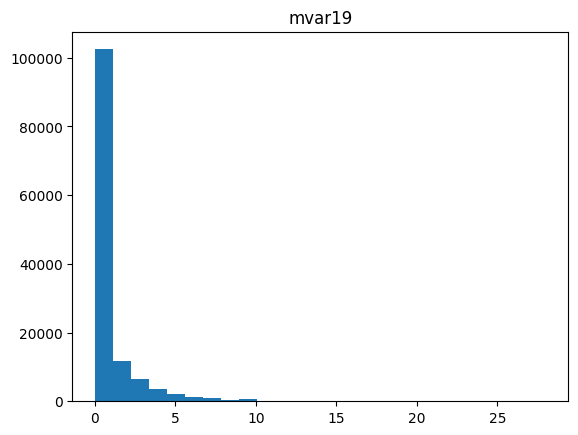

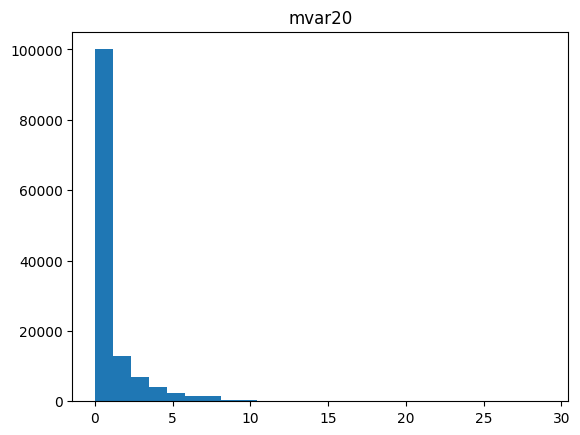

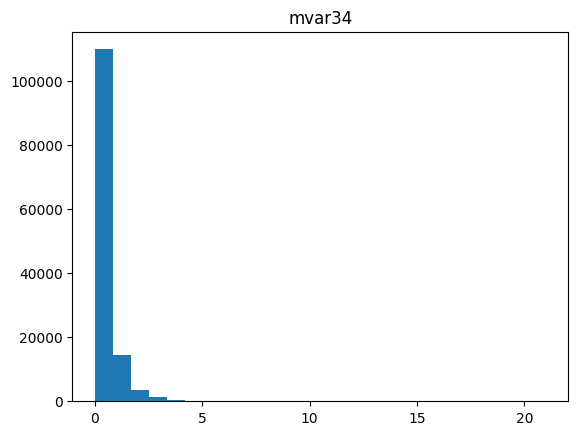

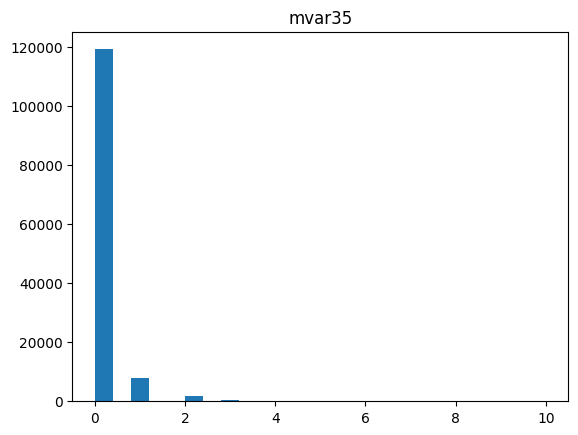

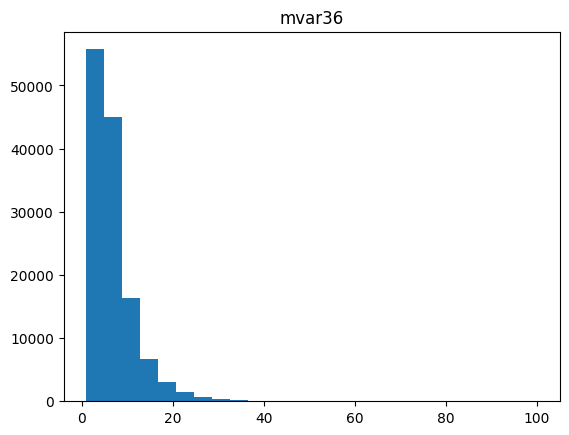

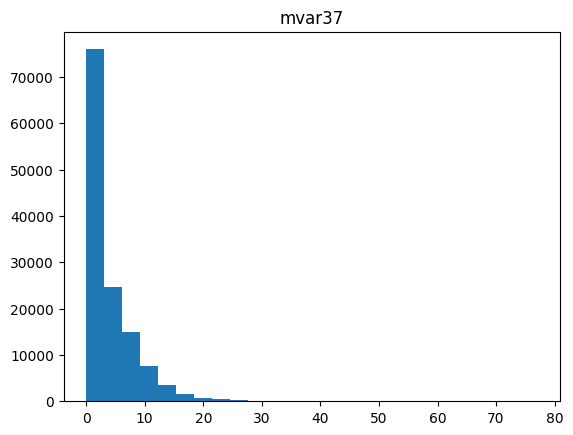

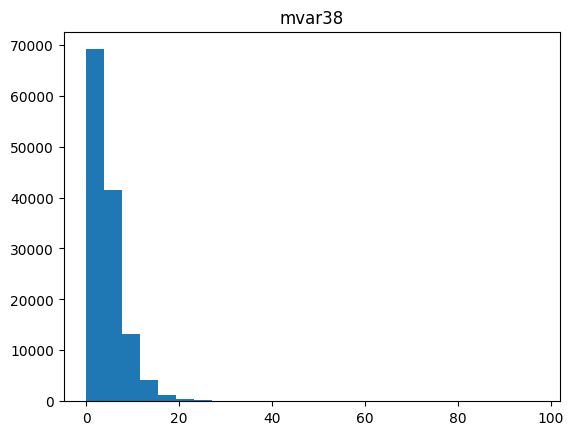

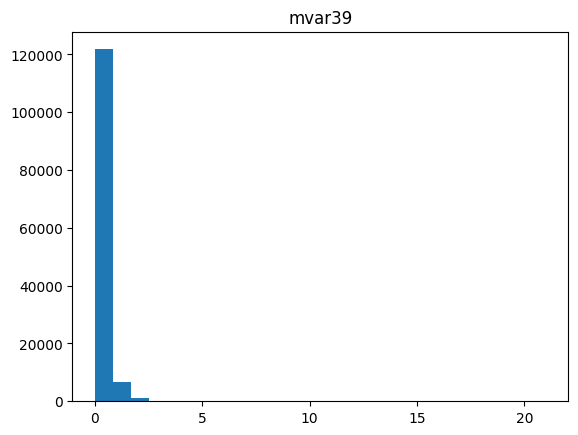

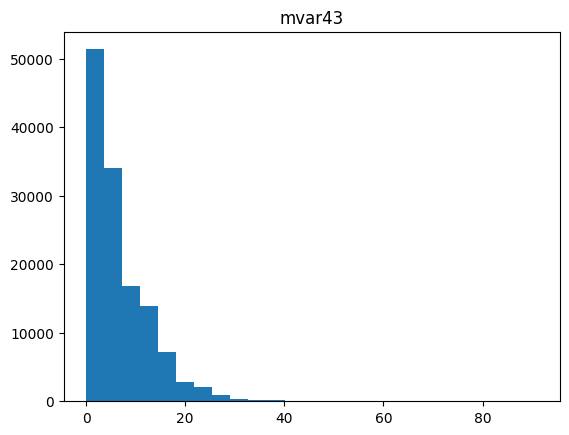

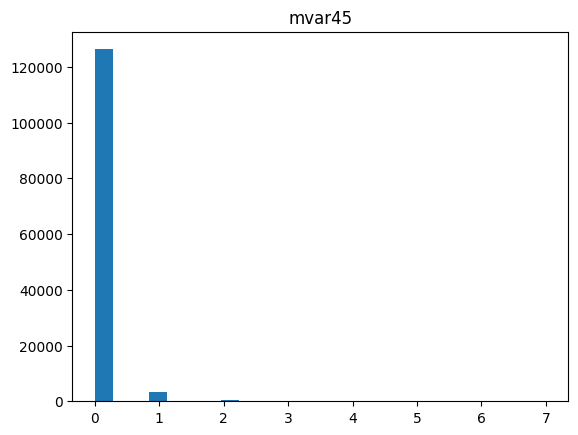

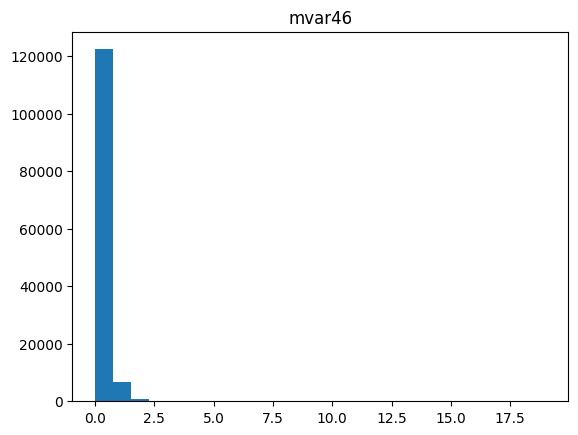

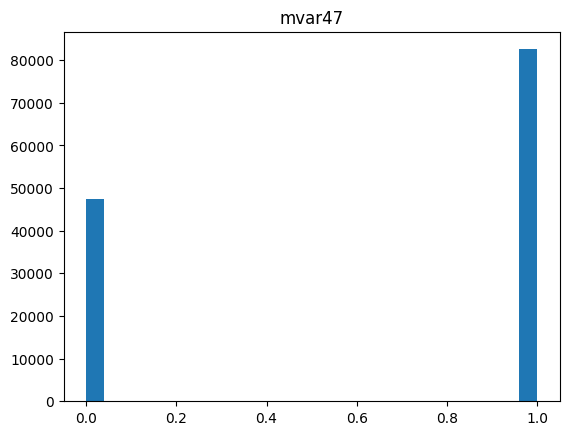

In [35]:
for feature in discrete_features:
    plt.hist(df[feature],bins=25)
    plt.title(feature)
    plt.show()

#### none of the discrete features are following normal distribution, so we can convert them into categorical features and encode them

In [34]:
for feature in discrete_features:
    df[feature]=feature+df[feature].astype(str)

In [35]:
df[discrete_features].nunique()

mvar16    12
mvar17    15
mvar18    16
mvar19    26
mvar20    29
mvar34    20
mvar35    11
mvar36    80
mvar37    60
mvar38    68
mvar39    19
mvar43    61
mvar45     8
mvar46     8
mvar47     2
dtype: int64

## Handling rare categories

In [36]:
for feature in discrete_features:
    series=pd.value_counts(df[feature])
    mask = (series/series.sum() * 100).lt(0.025)
    df[feature] = np.where(df[feature].isin(series[mask].index),feature+'Rare_Var',df[feature])

In [37]:
df[discrete_features].nunique()

mvar16     8
mvar17     9
mvar18     9
mvar19    15
mvar20    15
mvar34     9
mvar35     7
mvar36    36
mvar37    32
mvar38    30
mvar39     7
mvar43    40
mvar45     4
mvar46     5
mvar47     2
dtype: int64

In [38]:
low_count_features=[feature for feature in discrete_features if df[feature].nunique()<=10]
high_count_features=[feature for feature in discrete_features if feature not in low_count_features]

### Count based encoding for low count features

In [39]:
for feature in low_count_features:
    dic=df[feature].value_counts().to_dict()
    list1=np.arange(len(dic.values()),0,-1)
    dic2=dict(zip(list(dic.keys()),list1))
    df[feature]=df[feature].replace(dic2)

### One hot Encoding

In [40]:
def category_onehot_multcols(multcolumns):
    df_final=df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(df[fields],drop_first=True)
        
        df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

In [41]:
# df=category_onehot_multcols(categorical_features)

### Normal Label encoding using LabelEncoder

In [42]:
# labelencoder=LabelEncoder()
# for var in categorical_features:
#   df[var]=labelencoder.fit_transform(df[var])

### Target guided mean encoding

In [43]:
for feature in high_count_features:
    cat_labels=df.groupby([feature])['default_ind'].mean().sort_values().index
    cat_lables2={k:i for i,k in enumerate(cat_labels,0)}
    df[feature]=df[feature].map(cat_lables2)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130000 entries, 0 to 46999
Data columns (total 45 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   mvar1        130000 non-null  float64
 1   mvar2        130000 non-null  float64
 2   mvar3        130000 non-null  float64
 3   mvar4        130000 non-null  float64
 4   mvar5        130000 non-null  float64
 5   mvar6        130000 non-null  float64
 6   mvar7        130000 non-null  float64
 7   mvar8        130000 non-null  float64
 8   mvar9        130000 non-null  float64
 9   mvar10       130000 non-null  float64
 10  mvar11       130000 non-null  float64
 11  mvar12       130000 non-null  float64
 12  mvar13       130000 non-null  float64
 13  mvar14       130000 non-null  int64  
 14  mvar15       130000 non-null  float64
 15  mvar16       130000 non-null  int64  
 16  mvar17       130000 non-null  int64  
 17  mvar18       130000 non-null  int64  
 18  mvar19       130000 non-n

## Scaling

In [45]:
pred_features=["default_ind"]
train_features=[i for i in df.columns if i not in pred_features+["application_key"]]

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=StandardScaler()
df[train_features]=sc.fit_transform(df[train_features])

## Train Test split

In [47]:
df_train=df.iloc[:train_data.shape[0],:]
df_test=df.iloc[train_data.shape[0]:,:]

In [48]:
df_test=df_test.drop(columns=pred_features)
# df_test=df_test[['mvar1','mvar25','mvar26','mvar27','mvar29','mvar42']] #selecting features based on distributions

In [49]:
X_train=df_train.drop(columns=pred_features)
# X_train=df_train[['mvar1','mvar25','mvar26','mvar27','mvar29','mvar42']]
y_train=df_train[pred_features]

In [50]:
X_train,x_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size = 0.1,random_state=1)

## Hypothesis testing by assessing the predictive power of variable for logistic regression

In [51]:
import statsmodels.api as sm

In [52]:
reg_log = sm.Logit(y_train, X_train)
results_log = reg_log.fit()
results_log.summary2()

Optimization terminated successfully.
         Current function value: 0.604541
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: -0.008    
Dependent Variable: default_ind      AIC:              90406.4039
Date:               2021-12-20 23:37 BIC:              90812.1382
No. Observations:   74700            Log-Likelihood:   -45159.   
Df Model:           43               LL-Null:          -44792.   
Df Residuals:       74656            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
mvar1    -0.2340     0.0196   -11.9519   0.0000   -0.2724   -0.1957
mvar2     0.2714     0.0108    25.1674   0.0000    0.2503    0.2926
mvar3    -0.0375     0.0136    -2.7552   0.0059   -0.0642   -0.0108
mvar4    -0.0052     0.0194    -0.2694   0.7876   -0.0433    0.0328
mvar5     0.0028     0.0113     0.2486   0.8037   -0.0193    0.0250
mvar6     0.0219     0.0102     2.1536   0.0313    0.0020    0.0418
mvar7    -0.0034     0.0207    -0.1644   0.8694   -0.0439    0.0371
mvar8     0.0434     0.0125     3.4553   0.0005    0.0188    0.0680
mvar9     0.1125     0.0156     7.2145   0.0000    0.0819    0.1430
mvar10   -0.0045     0.0233    -0.1944   0.8458   -0.0502    0.0411
mvar11    0.0010     0.0094     0.1048   0.9165   -0.0174    0.0193
mvar12   -0.0645     0.0107    -6.0318   0.0000   -0.0855   -0.0436
mvar13   -0.0096     0.0106    -0.9136   0.3609   -0.0303    0.0110
mvar14    0.0103     0.0096     1.0702   0.2845   -0.0086    0.0292
mvar15   -0.0393     0.0087    -4.4997   0.0000   -0.0564   -0.0222
mvar16   -0.0492     0.0279    -1.7660   0.0774   -0.1038    0.0054
mvar17    0.0167     0.0637     0.2630   0.7925   -0.1080    0.1415
mvar18   -0.1672     0.0582    -2.8750   0.0040   -0.2812   -0.0532
mvar19    0.0524     0.0348     1.5072   0.1318   -0.0157    0.1206
mvar20   -0.0395     0.0350    -1.1290   0.2589   -0.1080    0.0290
mvar21    0.0384     0.0128     3.0028   0.0027    0.0133    0.0635
mvar22    0.0568     0.0143     3.9611   0.0001    0.0287    0.0848
mvar23    0.0559     0.0136     4.1174   0.0000    0.0293    0.0825
mvar24   -0.0039     0.0074    -0.5294   0.5966   -0.0185    0.0106
mvar25   -0.0708     0.0145    -4.8974   0.0000   -0.0992   -0.0425
mvar26    0.0205     0.0203     1.0116   0.3118   -0.0192    0.0602
mvar27   -0.0022     0.0209    -0.1038   0.9173   -0.0431    0.0388
mvar28    0.1091     0.0116     9.4275   0.0000    0.0864    0.1317
mvar29   -0.0329     0.0127    -2.6008   0.0093   -0.0577   -0.0081
mvar30   -0.0325     0.0084    -3.8886   0.0001   -0.0489   -0.0161
mvar32    0.1145     0.0213     5.3654   0.0000    0.0727    0.1564
mvar33   -0.0046     0.0091    -0.5078   0.6116   -0.0226    0.0133
mvar34   -0.0922     0.0119    -7.7677   0.0000   -0.1155   -0.0689
mvar35   -0.1613     0.0119   -13.6013   0.0000   -0.1846   -0.1381
mvar36    0.1174     0.0122     9.6520   0.0000    0.0935    0.1412
mvar37    0.2304     0.0159    14.5197   0.0000    0.1993    0.2615
mvar38    0.0099     0.0109     0.9052   0.3653   -0.0115    0.0313
mvar39   -0.0829     0.0126    -6.5757   0.0000   -0.1076   -0.0582
mvar42    0.2891     0.0137    21.0747   0.0000    0.2622    0.3160
mvar43    0.0778     0.0121     6.4439   0.0000    0.0541    0.1015
mvar44   -0.0360     0.0095    -3.7809   0.0002   -0.0547   -0.0174
mvar45   -0.0228     0.0084    -2.7250   0.0064   -0.0392   -0.0064
mvar46   -0.0839     0.0189    -4.4398   0.0000   -0.1209   -0.0469
mvar47    0.2562     0.0083    30.9577   0.0000    0.2400    0.2725
=================================================================

"""

In [ ]:
high_p_features=['mvar5','mvar7','mvar10','mvar11','mvar27']

## Models

### XGBoost Classifier

In [57]:
from xgboost.sklearn import XGBClassifier

xgb1=XGBClassifier(base_score=0.75, booster='gblinear', colsample_bylevel=0.5, colsample_bynode=0.7, colsample_bytree=0.7, 
                   gamma=0.2, gpu_id=1,importance_type='gain',
                   interaction_constraints='',learning_rate=0.05, max_delta_step=0, max_depth=8, 
                   min_child_weight=4, missing=None, monotone_constraints='(1,-1)', n_estimators=900, 
                   n_jobs=4, num_parallel_tree=1, random_state=0, 
                   reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
                   validate_parameters=1, verbosity=3)

In [58]:
xgb1.fit(X_train,y_train)

C:\Users\himas\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.75, booster='gblinear', colsample_bylevel=0.5,
              colsample_bynode=0.7, colsample_bytree=0.7, gamma=0.2, gpu_id=1,
              interaction_constraints='', learning_rate=0.05, max_depth=8,
              min_child_weight=4, monotone_constraints='(1,-1)',
              n_estimators=900, n_jobs=4, num_parallel_tree=1,
              tree_method='exact', validate_parameters=1, verbosity=3)

### Hyper parameter Tuning

In [290]:
params={
"learning_rate" : [0.05,0.1,0.15,0.20] ,
"max_depth" : [2,3,4,5,6,7,8,10,12, 15],
"n_estimators":[200, 300, 400, 500, 900, 1100],
"min_child_weight" : [ 1,2,3,4 ],
"base_score":[0.25,0.5,0.75,1],
# "booster":['gbtree','gblinear'],
"gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [805]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [806]:
classifier=xgboost.XGBClassifier()

In [293]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=10,
                                 scoring='roc_auc',n_jobs=4,cv=5,verbose=5,
                                 return_train_score = True,random_state=42)

from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\himas\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.51161202 0.5108385  0.5141062  0.51024888 0.51299872 0.50702888
        nan 0.50933723 0.51093265        nan]
  category=UserWarning
C:\Users\himas\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the train scores are non-finite: [0.99764736 0.81706806 0.8273085  0.54609491 0.99299344 0.99075989
        nan 0.98916586 0.61338645        nan]
  category=UserWarning
C:\Users\himas\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



 Time taken: 0 hours 38 minutes and 37.31 seconds.


In [302]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [295]:
random_search.best_estimator_

XGBClassifier(base_score=0.75, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.05, max_depth=8, min_child_weight=4,
              n_estimators=900)

In [59]:
y_pred_prob1 = xgb1.predict_proba(X_train)[:,1]
y_pred_test1 = xgb1.predict_proba(df_test)[:,1]
y_pred_valid1 = xgb1.predict_proba(x_valid)[:,1]

## Random Forests

In [57]:
from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=50,random_state=42)
rf = RandomForestClassifier(bootstrap=False, max_depth=12, max_features='sqrt',
                       min_samples_split=5, n_estimators=208)
rf.fit(X_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=False, max_depth=12, max_features='sqrt',
                       min_samples_split=5, n_estimators=208)

#### Hyper parameter Tuning

In [444]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 25, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [445]:
random_grid = {'n_estimators': n_estimators,
'max_depth': max_depth,
'max_features':max_features,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [25, 55, 86, 116, 147, 177, 208, 238, 269, 300], 'max_depth': [2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 20, None], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [446]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
n_iter = 10,scoring='roc_auc', cv = 5, verbose=5, random_state=42, n_jobs = 5)

In [447]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\himas\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    max_depth=18,
                                                    max_features='sqrt',
                                                    min_samples_split=5,
                                                    n_estimators=341),
                   n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 4, 5, 7, 8, 9, 11,
                                                      12, 13, 14, 16, 17, 18,
                                                      20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 55, 86, 116, 147,
       

In [448]:
rf=rf_random.best_estimator_
rf

RandomForestClassifier(bootstrap=False, max_depth=12, max_features='sqrt',
                       min_samples_split=5, n_estimators=208)

In [58]:
y_pred_valid2 = rf.predict_proba(x_valid)[:,1]
y_pred_prob2 = rf.predict_proba(X_train)[:,1]
y_pred_test2 = rf.predict_proba(df_test)[:,1]

### CatBoost

In [59]:
# !pip install catboost

In [60]:
df2=pd.concat([ID,df],axis='columns')

In [61]:
df2.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,-0.548910,0.394797,-0.484674,-0.263163,-0.186435,-0.403221,-0.233841,-0.605635,0.180438,-0.180269,-0.152884,0.005816,-0.201428,-0.008383,-0.193877,-1.519067,-1.264493,-1.229735,1.136782,1.098057,1.219305,1.582199,-0.114143,0.033907,-0.227147,0.438780,-0.062297,-0.641661,-0.312773,-1.407385,0.329885,-0.762555,-1.206302,0.257733,0.286490,-1.288940,-0.086897,-2.541208,-0.653254,-1.385589,-0.302702,0.163225,0.236402,0.758346,0.0
1,230033,1.066684,-0.146027,-0.484674,-0.263163,-0.186435,-0.372204,-0.200766,-0.291761,-0.271734,-0.251344,-0.152884,-0.519991,-0.221346,-0.019061,-0.193877,0.321111,0.333502,0.341132,-0.534855,-0.566299,0.538114,-1.072171,-1.099898,-0.211911,-0.572389,-0.446075,-0.381245,1.601717,-1.007888,0.098602,-0.581833,-0.861166,0.348396,0.257733,0.286490,0.889700,-0.561293,0.224490,-0.887069,-1.642894,-0.305400,0.163225,0.236402,-1.318658,1.0
2,230034,-0.021149,-0.408179,-0.484674,-0.263163,-0.186435,-0.312906,-0.309691,-0.365245,-0.347644,-0.417854,-0.152884,-0.315820,-0.178915,-0.014660,-0.193877,0.321111,0.333502,0.341132,-0.534855,-0.566299,0.040077,-0.102658,-0.114143,-0.084228,-0.199305,-0.202767,-0.185280,-0.596682,-0.284672,0.917602,-0.303919,2.382051,0.348396,0.257733,-0.801440,0.691642,-0.798491,0.224490,-0.887069,1.101690,1.243289,0.163225,0.236402,0.758346,1.0
3,230035,-0.085773,-0.523952,-0.484674,-0.263163,-0.186435,0.199489,0.211473,-0.095218,-0.229203,0.098031,-0.152884,-0.591083,-0.255203,-0.013592,-0.193877,0.321111,0.333502,0.341132,-0.534855,-0.566299,0.040077,-1.387049,-0.114143,-0.229405,-0.349652,-0.291143,-0.908660,-0.639441,0.138079,0.098602,-0.489861,0.442690,0.348396,0.257733,-0.620118,0.691642,-0.561293,0.224490,-0.473402,0.672849,-0.759121,0.163225,0.236402,-1.318658,0.0
4,230036,0.431217,-0.656820,-0.464300,-0.263163,-0.186435,1.254383,-0.245200,-0.035837,-0.481059,-0.385533,-0.152884,-0.381337,0.232492,-0.008383,1.106068,0.321111,0.333502,0.341132,-0.534855,-0.566299,-1.244995,-1.123840,-0.114143,-0.124736,-0.752965,-0.379884,-0.307859,-0.610146,-0.876338,0.098602,-0.603826,-0.795425,0.348396,0.257733,-0.982762,0.691642,-0.561293,0.224490,-0.887069,1.101690,0.929175,0.163225,0.236402,-1.318658,0.0


In [62]:
Train=df2.iloc[:train_data.shape[0],:]

In [63]:
features=[feature for feature in df2.columns if feature not in pred_features+['application_key']]

In [64]:
import random
from catboost import CatBoostClassifier

In [65]:
clf = CatBoostClassifier(
    iterations=2500,
    eval_metric = 'AUC',
    learning_rate = 0.02,
    verbose=500,
)

random.seed(2)
dev_ids = random.sample(Train['application_key'].to_list(), Train.shape[0]-int(Train.shape[0]/10))
dev = Train[Train.application_key.isin(dev_ids)]
val = Train[Train.application_key.isin(dev_ids) == False]

clf.fit(
    dev[features], dev[pred_features],
    eval_set=(val[features], val[pred_features]),
)

0:	test: 0.7488790	best: 0.7488790 (0)	total: 232ms	remaining: 9m 40s
500:	test: 0.7843858	best: 0.7843858 (500)	total: 32.5s	remaining: 2m 9s
1000:	test: 0.7854158	best: 0.7854158 (1000)	total: 1m 4s	remaining: 1m 36s
1500:	test: 0.7858396	best: 0.7858542 (1484)	total: 1m 35s	remaining: 1m 3s
2000:	test: 0.7858582	best: 0.7858898 (1919)	total: 2m 7s	remaining: 31.7s
2499:	test: 0.7856602	best: 0.7859064 (2013)	total: 2m 38s	remaining: 0us

bestTest = 0.7859064277
bestIteration = 2013

Shrink model to first 2014 iterations.


In [66]:
y_pred_valid3 = clf.predict_proba(x_valid)[:,1]
y_pred_prob3 = clf.predict_proba(X_train)[:,1]
y_pred_test3 = clf.predict_proba(df_test)[:,1]

## Logistice Regression

In [191]:
lg=LogisticRegression(fit_intercept=False, C=1e12,penalty ="l2")
lg.fit(X_train, y_train)

C:\Users\himas\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=1, fit_intercept=False)

In [192]:
y_pred_valid4 = lg.predict_proba(x_valid)[:,1]

y_pred_prob4 = lg.predict_proba(X_train)[:,1]
y_pred_test4 = lg.predict_proba(df_test)[:,1]

In [67]:
#Random Forests
# y_pred_prob=y_pred_prob2
# y_pred_test=y_pred_test2
# y_pred_valid=y_pred_valid2

# # XBG
# y_pred_prob=y_pred_prob1
# y_pred_test=y_pred_test1
# y_pred_valid=y_pred_valid1

# # CatBoost
# y_pred_prob=y_pred_prob3
# y_pred_test=y_pred_test3
# y_pred_valid=y_pred_valid3

# LG
# y_pred_prob=y_pred_prob4
# y_pred_test=y_pred_test4
# y_pred_valid=y_pred_valid4

# manual stacking 

y_pred_prob=0.1*y_pred_prob2+0.9*y_pred_prob3
y_pred_test=0.1*y_pred_test2+0.9*y_pred_test3
y_pred_valid=0.1*y_pred_valid2+0.9*y_pred_valid3


# y_pred_prob=0.3*y_pred_prob1+0.3*y_pred_prob2+0.2*y_pred_prob3+0.2*y_pred_prob4
# y_pred_test=0.3*y_pred_test1+0.3*y_pred_test2+0.2*y_pred_test3+0.2*y_pred_test4
# y_pred_valid=0.3*y_pred_valid1+0.3*y_pred_valid2+0.2*y_pred_valid3+0.2*y_pred_valid4

# y_pred_prob=0.2*y_pred_prob1+0.2*y_pred_prob2+0.2*y_pred_prob3 +0.2*y_pred_prob4+0.2*y_pred_prob5
# y_pred_test=0.2*y_pred_test1+0.2*y_pred_test2+0.2*y_pred_test3 +0.2*y_pred_test4+0.2*y_pred_test5
# y_pred_valid=0.2*y_pred_valid1+0.2*y_pred_valid2+0.2*y_pred_valid3 +0.2*y_pred_valid4+0.2*y_pred_valid5


# Stacking of models

In [54]:
# a=np.arange(0,1.1,0.1)
# b=np.arange(0,1.1,0.1)
# c=np.arange(0,1.1,0.1)
# d=np.arange(0,1.1,0.1)

In [55]:
# S_T=[]
# S_V=[]
# A=[]
# B=[]
# C=[]
# for i in range(len(a)):
#     for j in range(len(b)):
#         for k in range(len(c)):
#             if a[i]+b[j]+c[k]==1:
#                 y_comb_valid=a[i]*y_pred_valid1+b[j]*y_pred_valid3+c[k]*y_pred_valid4
#                 y_comb_train=a[i]*y_pred_prob1+b[j]*y_pred_prob3+c[k]*y_pred_prob4

#                 precisions, recalls, thresholds = precision_recall_curve(y_valid, y_comb_valid)
#                 # fpr, tpr, threshold = metrics.roc_curve(y_train, y_comb_train)
#                 cutoff = f1_cutoff(precisions, recalls, thresholds)

#                 predicted = pd.DataFrame()
#                 predicted["pred"] = y_comb_train
#                 predicted["pred"] = np.where(predicted["pred"] > float(cutoff), 1, 0)

#                 pred_valid = pd.DataFrame()
#                 pred_valid["pred"] = y_comb_valid
#                 pred_valid["pred"] = np.where(pred_valid["pred"] > float(cutoff), 1, 0)

#                 score_train=f1_score(y_train, predicted,average='macro')
#                 score_valid=f1_score(y_valid, pred_valid,average='macro')
#                 S_T.append(score_train)
#                 S_V.append(score_valid)
#                 A.append(a[i])
#                 B.append(b[j])
#                 C.append(c[k])

# S_T=np.array(S_T)
# S_V=np.array(S_V)
# A=np.array(A)
# B=np.array(B)
# C=np.array(C)

# S_T=pd.DataFrame(S_T,columns=['F1_TRAIN'])
# S_V=pd.DataFrame(S_V,columns=['F1_VALID'])
# A=pd.DataFrame(A,columns=['XG_Coeff'])
# B=pd.DataFrame(B,columns=['CB_Coeff'])
# C=pd.DataFrame(C,columns=['LG_Coeff'])

# dff=pd.concat([A,B,C,S_T,S_V],axis='columns')
# dff['comb']=dff['F1_TRAIN']+dff['F1_VALID']

In [56]:
# dff=dff.sort_values(by="F1_VALID", ascending= False)
# dff.head()

# Model Evaluation 

In [68]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_prob)

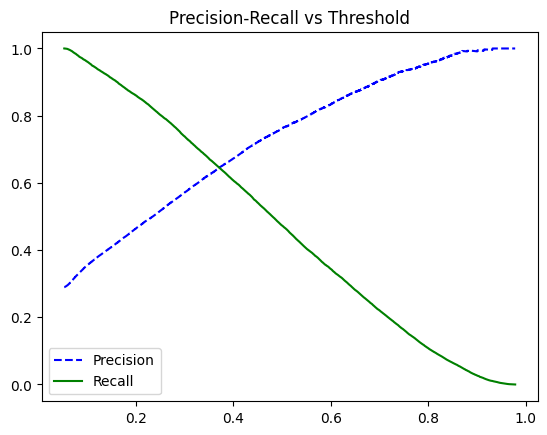

In [69]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.title('Precision-Recall vs Threshold')
    plt.legend(['Precision','Recall'],loc=0)
[...]
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [70]:
def cutoff_youdens_j(fpr,tpr,thresholds):
    a = tpr-fpr
    b = sorted(zip(a,thresholds))
    return b[-1][1] 

def f1_cutoff(precisions, recalls, thresholds):
    a=precisions*recalls/(recalls+precisions)
    b = sorted(zip(a,thresholds))
    return b[-1][1]
precisions, recalls, thresholds = precision_recall_curve(y_valid, y_pred_valid)
#y_valid, y_pred_valid

In [71]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_valid, y_pred_valid)

In [72]:
cutoff = cutoff_youdens_j(fpr, tpr, threshold)
cutoff

0.3170120320049939

In [73]:
cutoff=f1_cutoff(precisions, recalls, thresholds)
cutoff

0.3347412323765427

In [74]:
predicted = pd.DataFrame()
predicted["pred"] = y_pred_prob
predicted["pred"] = np.where(predicted["pred"] > float(cutoff), 1, 0)
predicted

pred_valid = pd.DataFrame()
pred_valid["pred"] = y_pred_valid
pred_valid["pred"] = np.where(pred_valid["pred"] > float(cutoff), 1, 0)
pred_valid

predictions = pd.DataFrame()
predictions[pred_features[0]] = y_pred_test
predictions[pred_features[0]] = np.where(predictions[pred_features[0]] > float(cutoff), 1, 0)
predictions

,default_ind
0,0
1,0
2,0
3,1
4,1
...,...
46995,1
46996,0
46997,1
46998,0


In [75]:
conf_matrix = metrics.confusion_matrix(y_train, predicted)
print(conf_matrix)

acc_train = metrics.accuracy_score(y_train, predicted)
print(acc_train)
precision_train = metrics.precision_score(y_train, predicted)
print(precision_train)
sensitivity_train = metrics.recall_score(y_train, predicted)
print(sensitivity_train)
specificity_train = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])
print(specificity_train)
roc_auc_score(y_train, predicted)

[[43685  9561]
 [ 6608 14846]]
0.7835475234270415
0.6082681198016963
0.6919921692924397
0.8204372159411035


0.7562146926167715

In [76]:
conf_matrix = metrics.confusion_matrix(y_valid, pred_valid)
print(conf_matrix)

acc_train = metrics.accuracy_score(y_valid, pred_valid)
print(acc_train)
precision_train = metrics.precision_score(y_valid, pred_valid)
print(precision_train)
sensitivity_train = metrics.recall_score(y_valid, pred_valid)
print(sensitivity_train)
specificity_train = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])
print(specificity_train)
roc_auc_score(y_valid, pred_valid)

[[4841 1058]
 [ 720 1681]]
0.7857831325301204
0.6137276378240234
0.700124947938359
0.8206475673843024


0.7603862576613307

In [77]:
from sklearn.metrics import f1_score
print(f1_score(y_train, predicted))
f1_score(y_valid, pred_valid)   

0.6474346394540024


0.6540856031128405

# Downloading the predictions

In [774]:
sub=pd.read_csv('Submission.csv')

In [775]:
sub

,application_key,default_ind
0,578069,0
1,578070,1
2,578071,1
3,578072,1
4,578073,0
...,...,...
46995,310027,0
46996,310028,0
46997,310029,1
46998,310030,1


In [776]:
sub['default_ind']=predictions

In [777]:
sub

,application_key,default_ind
0,578069,0
1,578070,0
2,578071,0
3,578072,1
4,578073,1
...,...,...
46995,310027,1
46996,310028,0
46997,310029,1
46998,310030,0


In [778]:
# sub.to_csv('nashima_final.csv',index=False,header=False)

In [779]:
# checking percentage of defaulters in train set and predicted test set

print((train_data['default_ind'].sum()/len(train_data)))
print((sub['default_ind'].sum())/len(test_data))

0.28740963855421686
0.35006382978723405
